In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')


In [ ]:
pip install pytrends


In [ ]:
from pytrends.request import TrendReq


In [ ]:
pytrends = TrendReq(hl='en-US', tz=360, timeout=(10, 50))


In [ ]:
unique_games = df['Name'].unique()
print(unique_games)

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [ ]:

df['NA_Sales_Percent'] = (df['NA_Sales'] / df['Global_Sales'] * 100).round(0).astype(int)
df['EU_Sales_Percent'] = (df['EU_Sales'] / df['Global_Sales'] * 100).round(0).astype(int)
df['JP_Sales_Percent'] = (df['JP_Sales'] / df['Global_Sales'] * 100).round(0).astype(int)
df['Other_Sales_Percent'] = (df['Other_Sales'] / df['Global_Sales'] * 100).round(0).astype(int)


print(df[['NA_Sales_Percent', 'EU_Sales_Percent', 'JP_Sales_Percent', 'Other_Sales_Percent']].head())


   NA_Sales_Percent  EU_Sales_Percent  JP_Sales_Percent  Other_Sales_Percent
0                50                35                 5                   10
1                72                 9                17                    2
2                44                36                11                    9
3                48                33                10                    9
4                36                28                33                    3


In [ ]:


platform_counts = df['Platform'].value_counts()


specified_platforms = ['PS3', 'PS4', 'X360', 'XOne', 'PC', 'Wii','WiiU','PS2','DS','PSP','PS','PC','XB','GBA','GC']
for platform in specified_platforms:
    if platform in platform_counts:
        print(f"{platform}: {platform_counts[platform]}")
    else:
        print(f"{platform}: 0")

PS3: 1331
PS4: 393
X360: 1262
XOne: 247
PC: 974
Wii: 1320
WiiU: 147
PS2: 2161
DS: 2152
PSP: 1209
PS: 1197
PC: 974
XB: 824
GBA: 822
GC: 556


In [ ]:

for column in df.columns:

    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {len(unique_values)}")
        print(f"Sample unique values: {unique_values}")
        print("\n")


Unique values in column 'Name': 11563
Sample unique values: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


Unique values in column 'Platform': 31
Sample unique values: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Unique values in column 'Genre': 13
Sample unique values: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Unique values in column 'Publisher': 582
Sample unique values: ['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainm

In [ ]:
dev_counts = df['Developer'].value_counts()
devs_10_or_more = dev_counts[dev_counts >= 2]
print(f"Number of unique devs appearing 10 or more times: {len(devs_10_or_more)}")



Number of unique devs appearing 10 or more times: 1046


In [ ]:
publisher_counts = df['Publisher'].value_counts()
publishers_10_or_more = publisher_counts[publisher_counts >= 2]
print(f"Number of unique publishers appearing 10 or more times: {len(publishers_10_or_more)}")



Number of unique publishers appearing 10 or more times: 393


In [ ]:
dev_counts = df['Developer'].value_counts()

devs_less_than_10 = dev_counts[dev_counts < 2].index.tolist()


df_filtered = df[~df['Developer'].isin(devs_less_than_10)]

df_filtered.head()
df=df_filtered

In [ ]:

publisher_counts = df['Publisher'].value_counts()

publishers_less_than_10 = publisher_counts[publisher_counts < 2].index.tolist()


df_filtered = df[~df['Publisher'].isin(devs_less_than_10)]

df_filtered.head()
df=df_filtered

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'NA_Sales_Percent', 'EU_Sales_Percent', 'JP_Sales_Percent',
       'Other_Sales_Percent'],
      dtype='object')

In [ ]:
df.dropna(subset=['Publisher'], inplace=True)




In [ ]:
df.dropna(subset=['Year_of_Release'], inplace=True)


In [ ]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

In [ ]:
import numpy as np

df['User_Score'] = df['User_Score'].replace('tbd', np.nan).astype(float)
df['User_Score'].fillna(df['User_Score'].median(), inplace=True)



In [ ]:
df['User_Score'] = (df['User_Score'] * 10).astype(int)

In [ ]:

for column in df.columns:

    if df[column].dtype == 'object':
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {len(unique_values)}")
        print(f"Sample unique values: {unique_values}")
        print("\n")


Unique values in column 'Name': 4478
Sample unique values: ['Wii Sports' 'Mario Kart Wii' 'Wii Sports Resort' ... 'Bust-A-Move 3000'
 'STORM: Frontline Nation' '15 Days']


Unique values in column 'Platform': 17
Sample unique values: ['Wii' 'DS' 'PS3' 'PS2' 'X360' 'PS4' 'PS' '3DS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']


Unique values in column 'Genre': 12
Sample unique values: ['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']


Unique values in column 'Publisher': 259
Sample unique values: ['Nintendo' 'Take-Two Interactive' 'Sony Computer Entertainment'
 'Activision' 'Microsoft Game Studios' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'SquareSoft' 'GT Interactive'
 'Konami Digital Entertainment' 'Square Enix'
 'Sony Computer Entertainment Europe' 'Virgin Interactive' 'LucasArts'
 '505 Games' 'Capcom' 'Universal Interactive' 'Eidos Interactive'
 'RedOctane' 'Atari' 'Namco Bandai Games' '

In [ ]:
import pandas as pd


developer_counts = df['Developer'].value_counts().reset_index()
developer_counts.columns = ['Developer', 'Game_Count']


In [ ]:
import pandas as pd


developer_counts = df['Developer'].value_counts().reset_index()
developer_counts.columns = ['Developer', 'Game_Count']


In [ ]:

df = df.merge(developer_counts, on='Developer')


In [ ]:
categories, bins = pd.qcut(df['Game_Count'], 10, labels=False, duplicates='drop', retbins=True)
df['Developer_Rank'] = categories + 1


print("Bin edges: ", bins)

Bin edges:  [  1.   3.   5.   7.  11.  15.  21.  30.  50.  93. 156.]


In [ ]:
df['Developer_Rank'], bins = pd.qcut(df['Game_Count'], 11, labels=False, duplicates='drop', retbins=True)
df['Developer_Rank'] += 1


In [ ]:
df.dropna(subset=['User_Count'], inplace=True)

In [ ]:
def compute_ranks_and_save_bins(column_name):
    ranks, bin_edges = pd.qcut(df[column_name], 10, labels=False, duplicates='drop', retbins=True)
    ranks += 1
    return ranks, bin_edges


df['Rank_NA_Developer'], bins_na = compute_ranks_and_save_bins('Total_NA_Sales')
df['Rank_EU_Developer'], bins_eu = compute_ranks_and_save_bins('Total_EU_Sales')
df['Rank_JP_Developer'], bins_jp = compute_ranks_and_save_bins('Total_JP_Sales')
df['Rank_Other_Developer'], bins_other = compute_ranks_and_save_bins('Total_Other_Sales')


print("NA Sales Bin Edges:", bins_na)
print("EU Sales Bin Edges:", bins_eu)
print("JP Sales Bin Edges:", bins_jp)
print("Other Sales Bin Edges:", bins_other)import pandas as pd


df['Total_NA_Sales'] = df.groupby('Developer')['NA_Sales'].transform('sum')
df['Total_EU_Sales'] = df.groupby('Developer')['EU_Sales'].transform('sum')
df['Total_JP_Sales'] = df.groupby('Developer')['JP_Sales'].transform('sum')
df['Total_Other_Sales'] = df.groupby('Developer')['Other_Sales'].transform('sum')



In [ ]:
import pickle
bin_edges = {
    'NA': bins_na,
    'EU': bins_eu,
    'JP': bins_jp,
    'Other': bins_other,
    "Global": bins
}


with open('bin_edges.pickle', 'wb') as handle:
    pickle.dump(bin_edges, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
df=df.drop(columns=['Total_NA_Sales','Total_EU_Sales','Total_Other_Sales','Total_JP_Sales'])

In [ ]:
from datetime import datetime

current_year = datetime.now().year
df['Game_Age'] = 2016 - df['Year_of_Release']


In [ ]:
import plotly.express as px

In [ ]:
import pandas as pd


df['Score_Group'] = pd.cut(df['Critic_Score'], bins=[0, 49, 59, 69, 79, 89, 100],
                           labels=['0-49', '50-59', '60-69', '70-79', '80-89', '90-100'],
                           right=False)


heatmap_data = df.groupby(['Genre', 'Score_Group'])['Global_Sales'].median().reset_index()

heatmap_data_pivot = heatmap_data.pivot(index='Genre', columns='Score_Group', values='Global_Sales')



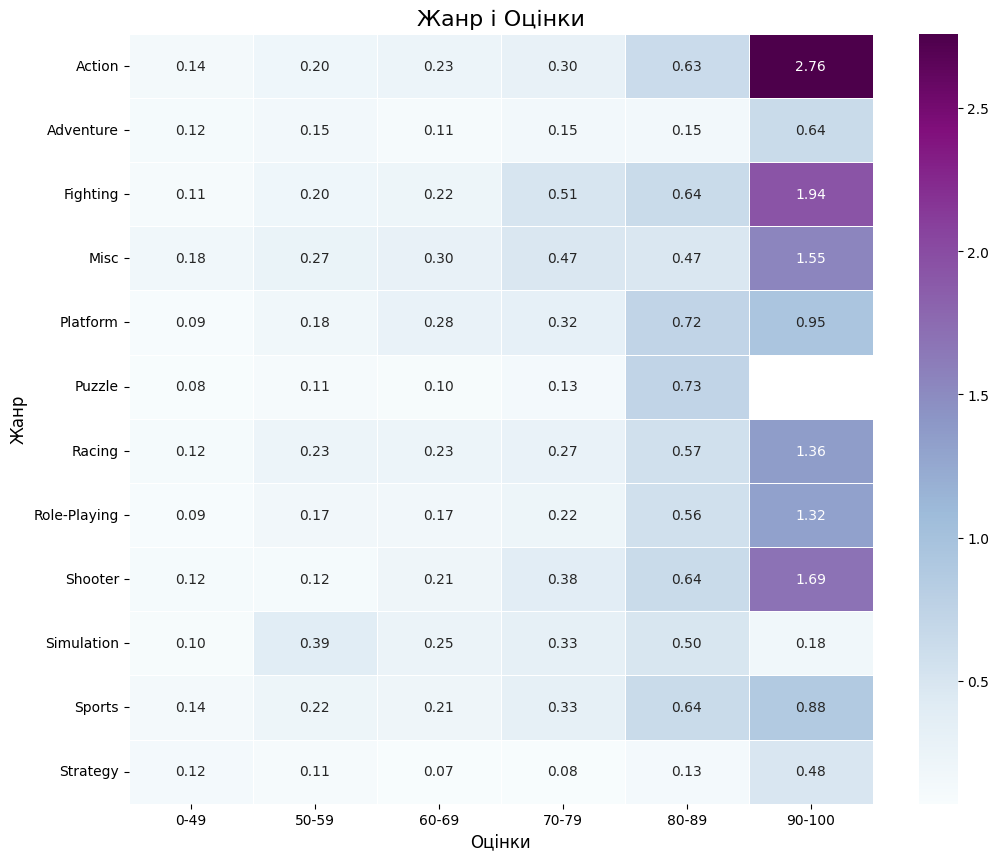

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))


sns.heatmap(heatmap_data_pivot, annot=True, fmt=".2f", cmap='BuPu', linewidths=.5)


plt.title('Жанр і Оцінки', fontsize=16)
plt.xlabel('Оцінки', fontsize=12)
plt.ylabel('Жанр', fontsize=12)

plt.show()


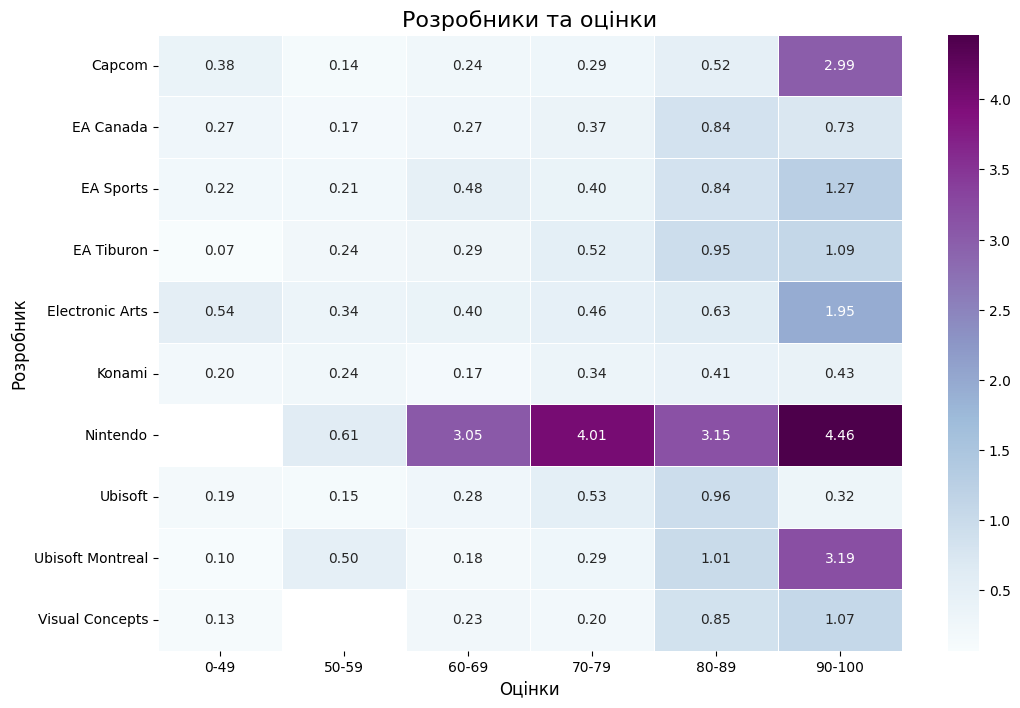

In [ ]:

popular_developers = df['Developer'].value_counts().nlargest(10).index


df_popular_devs = df[df['Developer'].isin(popular_developers)]


df_popular_devs['Score_Group'] = pd.cut(df_popular_devs['Critic_Score'], bins=[0, 49, 59, 69, 79, 89, 100],
                                        labels=['0-49', '50-59', '60-69', '70-79', '80-89', '90-100'],
                                        right=False)


heatmap_data_dev = df_popular_devs.groupby(['Developer', 'Score_Group'])['Global_Sales'].median().reset_index()


heatmap_data_pivot_dev = heatmap_data_dev.pivot(index='Developer', columns='Score_Group', values='Global_Sales')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_pivot_dev, annot=True, fmt=".2f", cmap='BuPu', linewidths=.5)
plt.title('Розробники та оцінки', fontsize=16)
plt.xlabel('Оцінки', fontsize=12)
plt.ylabel('Розробник', fontsize=12)
plt.show()




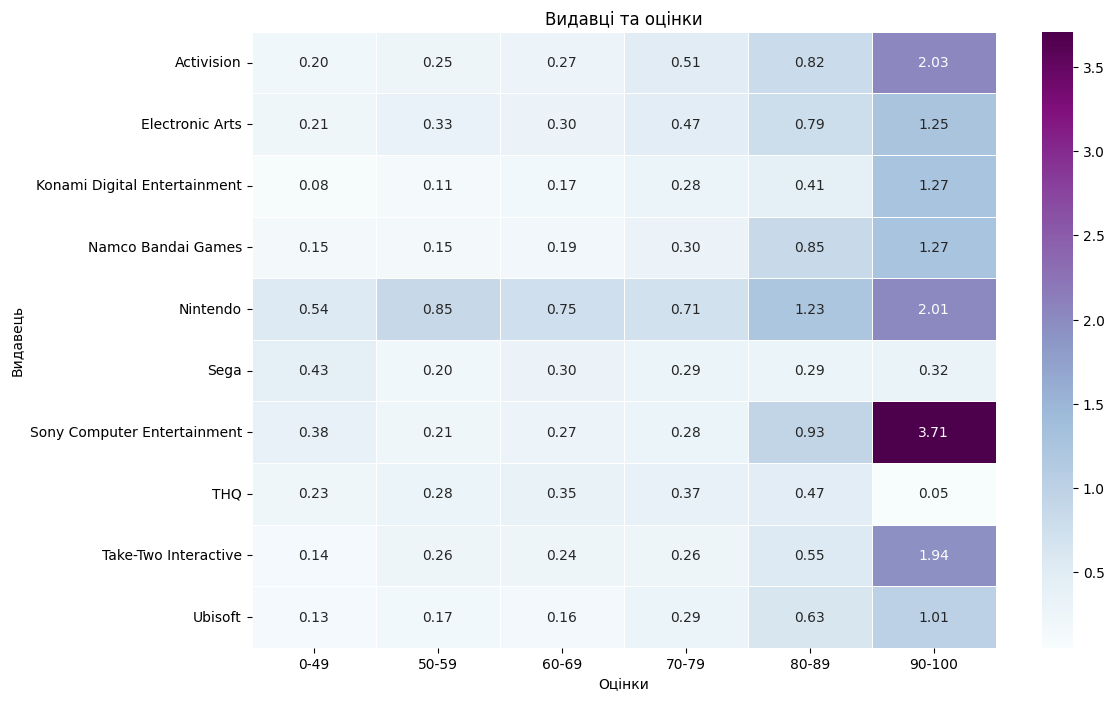

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


popular_publishers = df['Publisher'].value_counts().nlargest(10).index


df_popular_publishers = df[df['Publisher'].isin(popular_publishers)]


df_popular_publishers['Score_Group'] = pd.cut(df_popular_publishers['Critic_Score'], bins=[0, 49, 59, 69, 79, 89, 100],
                                               labels=['0-49', '50-59', '60-69', '70-79', '80-89', '90-100'],
                                               right=False)


heatmap_data_publisher = df_popular_publishers.groupby(['Publisher', 'Score_Group'])['Global_Sales'].median().reset_index()


heatmap_data_pivot_publisher = heatmap_data_publisher.pivot(index='Publisher', columns='Score_Group', values='Global_Sales')


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_pivot_publisher, annot=True, fmt=".2f", cmap='BuPu', linewidths=.5)
plt.title('Видавці та оцінки')
plt.xlabel('Оцінки')
plt.ylabel('Видавець')
plt.show()


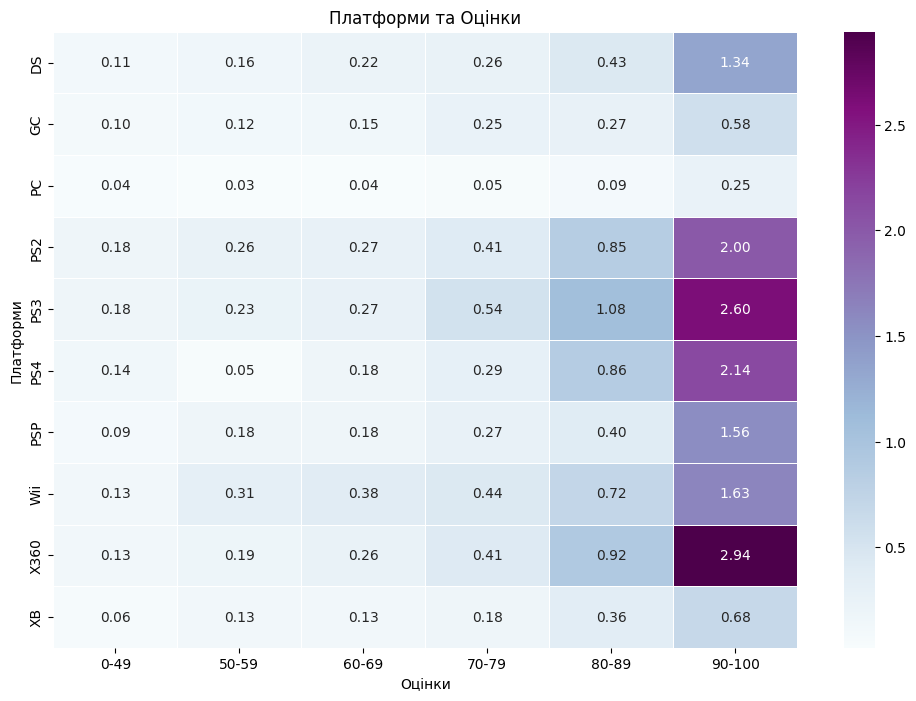

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


popular_platforms = df['Platform'].value_counts().nlargest(10).index


platform_df = df[df['Platform'].isin(popular_platforms)]


platform_df['Score_Group'] = pd.cut(platform_df['Critic_Score'], bins=[0, 49, 59, 69, 79, 89, 100],
                                    labels=['0-49', '50-59', '60-69', '70-79', '80-89', '90-100'],
                                    right=False)

platform_heatmap_data = platform_df.groupby(['Platform', 'Score_Group'])['Global_Sales'].median().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(platform_heatmap_data, annot=True, fmt=".2f", cmap='BuPu', linewidths=.5)
plt.title('Платформи та Оцінки')
plt.xlabel('Оцінки')
plt.ylabel('Платформи')
plt.show()


In [ ]:

df = df.drop(columns=['Score_Group'])
df.head()



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,EU_Sales_Percent,JP_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_NA_Developer,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,35,5,10,72,10,10,10,8,10,10
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,36,11,9,72,10,10,10,8,10,8
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,33,10,9,72,10,10,10,8,10,7
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,...,31,22,10,72,10,10,10,8,10,10
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,...,32,10,10,72,10,10,10,8,10,10


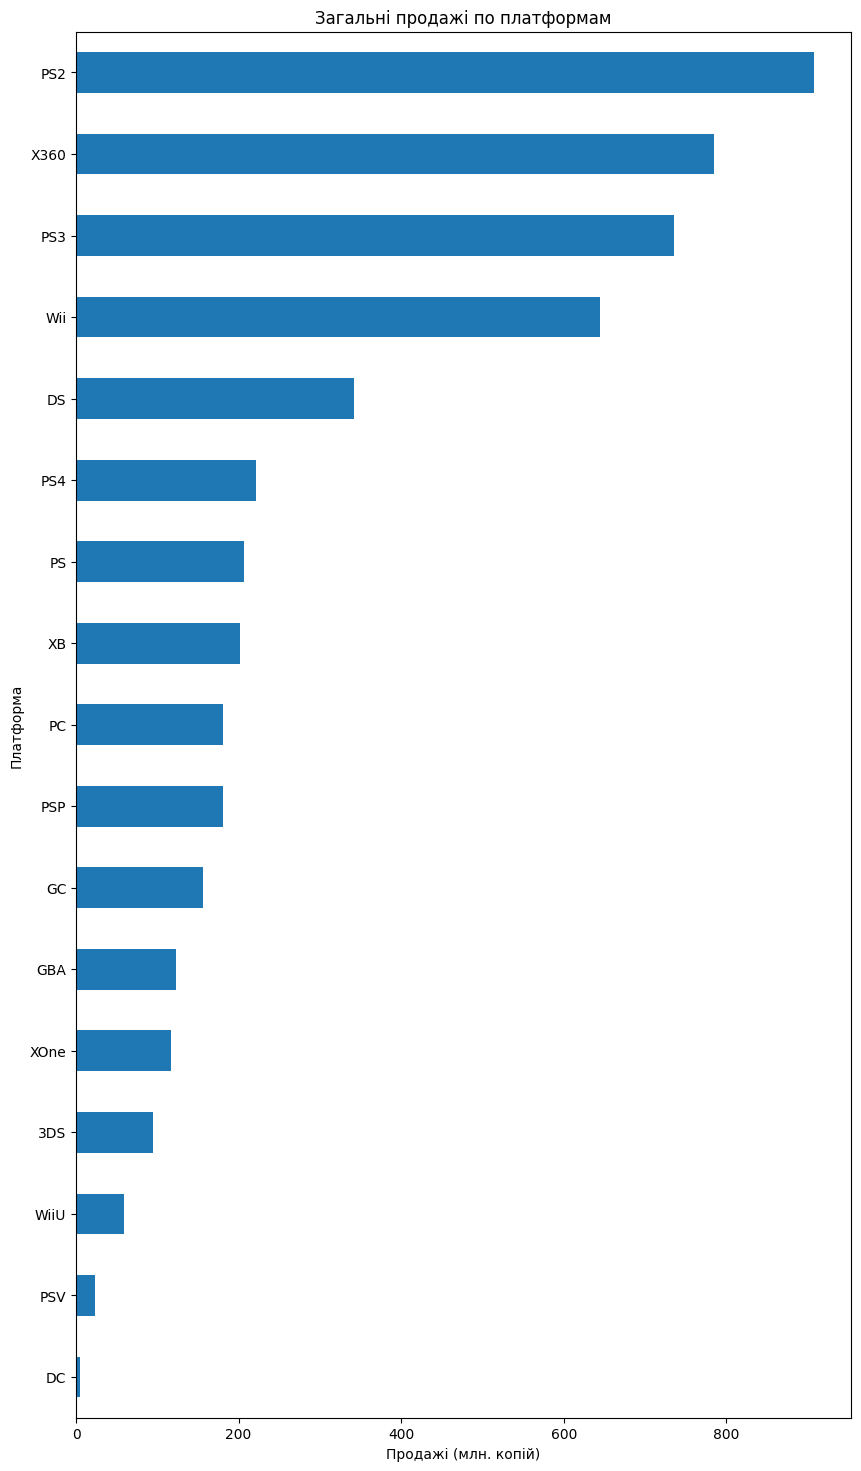

In [ ]:
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values()
plt.figure(figsize=(10, 18))
sales_by_platform.plot(kind='barh')
plt.title('Загальні продажі по платформам')
plt.xlabel('Продажі (млн. копій)')
plt.ylabel('Платформа')
plt.show()


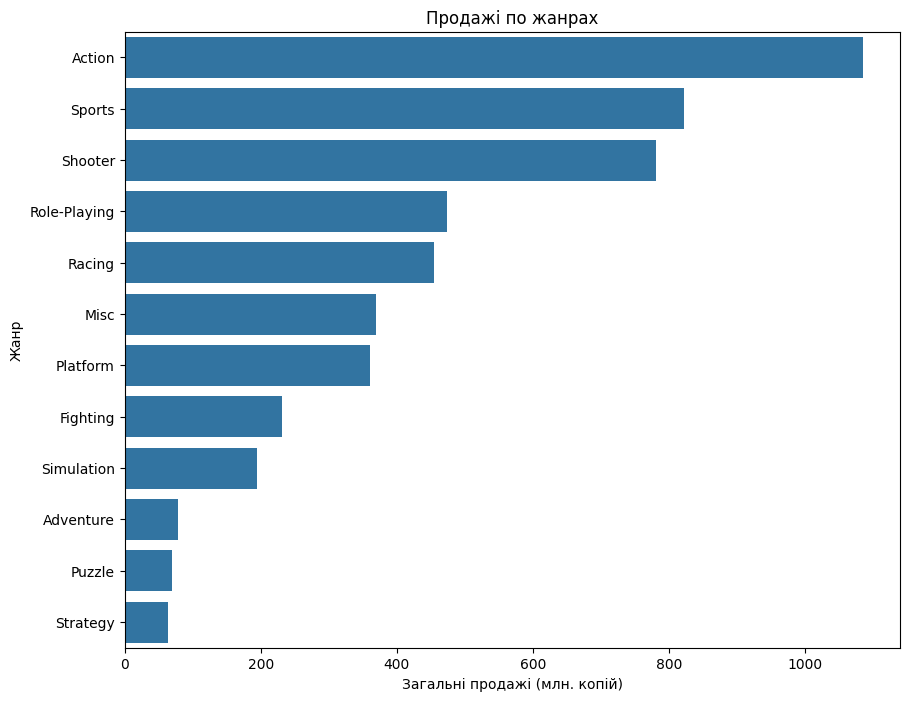

In [ ]:
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=sales_by_genre.values, y=sales_by_genre.index)
plt.title('Продажі по жанрах')
plt.xlabel('Загальні продажі (млн. копій)')
plt.ylabel('Жанр')
plt.show()


In [ ]:
import pandas as pd
import numpy as np



skewness_values = df.select_dtypes(include=['float64', 'int64']).skew().reset_index()
skewness_values.columns = ['Column', 'Skewness']

skewness_values['Skewness Type'] = skewness_values['Skewness'].apply(
    lambda x: 'positive (+ve) skewed' if x > 0 else ('negative (-ve) skewed' if x < 0 else 'normal distribution')
)

print(skewness_values)


                  Column   Skewness          Skewness Type
0        Year_of_Release   0.116736  positive (+ve) skewed
1               NA_Sales  16.303446  positive (+ve) skewed
2               EU_Sales  15.996366  positive (+ve) skewed
3               JP_Sales  10.346372  positive (+ve) skewed
4            Other_Sales  18.784522  positive (+ve) skewed
5           Global_Sales  16.083441  positive (+ve) skewed
6           Critic_Score  -0.735302  negative (-ve) skewed
7           Critic_Count   1.029200  positive (+ve) skewed
8             User_Score  -1.218967  negative (-ve) skewed
9             User_Count   8.620340  positive (+ve) skewed
10      NA_Sales_Percent  -0.407787  negative (-ve) skewed
11      EU_Sales_Percent   0.997848  positive (+ve) skewed
12      JP_Sales_Percent   3.212309  positive (+ve) skewed
13   Other_Sales_Percent   2.772118  positive (+ve) skewed
14            Game_Count   1.744985  positive (+ve) skewed
15        Developer_Rank  -0.063606  negative (-ve) skew

In [ ]:
df0=df.copy()

In [ ]:
df_up=df.copy()
df_up_log=df.copy()
df_log=df.copy()

In [ ]:

print("Skewness before square root transformation:")
print("NA_Sales_up:", df['NA_Sales'].skew())
print("EU_Sales_up:", df['EU_Sales'].skew())
print("JP_Sales_up:", df['JP_Sales'].skew())
print("Other_Sales_up:", df['Other_Sales'].skew())
print("Global_Sales_up:", df['Global_Sales'].skew())

Skewness before square root transformation:
NA_Sales_up: 16.303445688992323
EU_Sales_up: 15.996366146512738
JP_Sales_up: 10.346371716299924
Other_Sales_up: 18.784521642217946
Global_Sales_up: 16.083441169411934


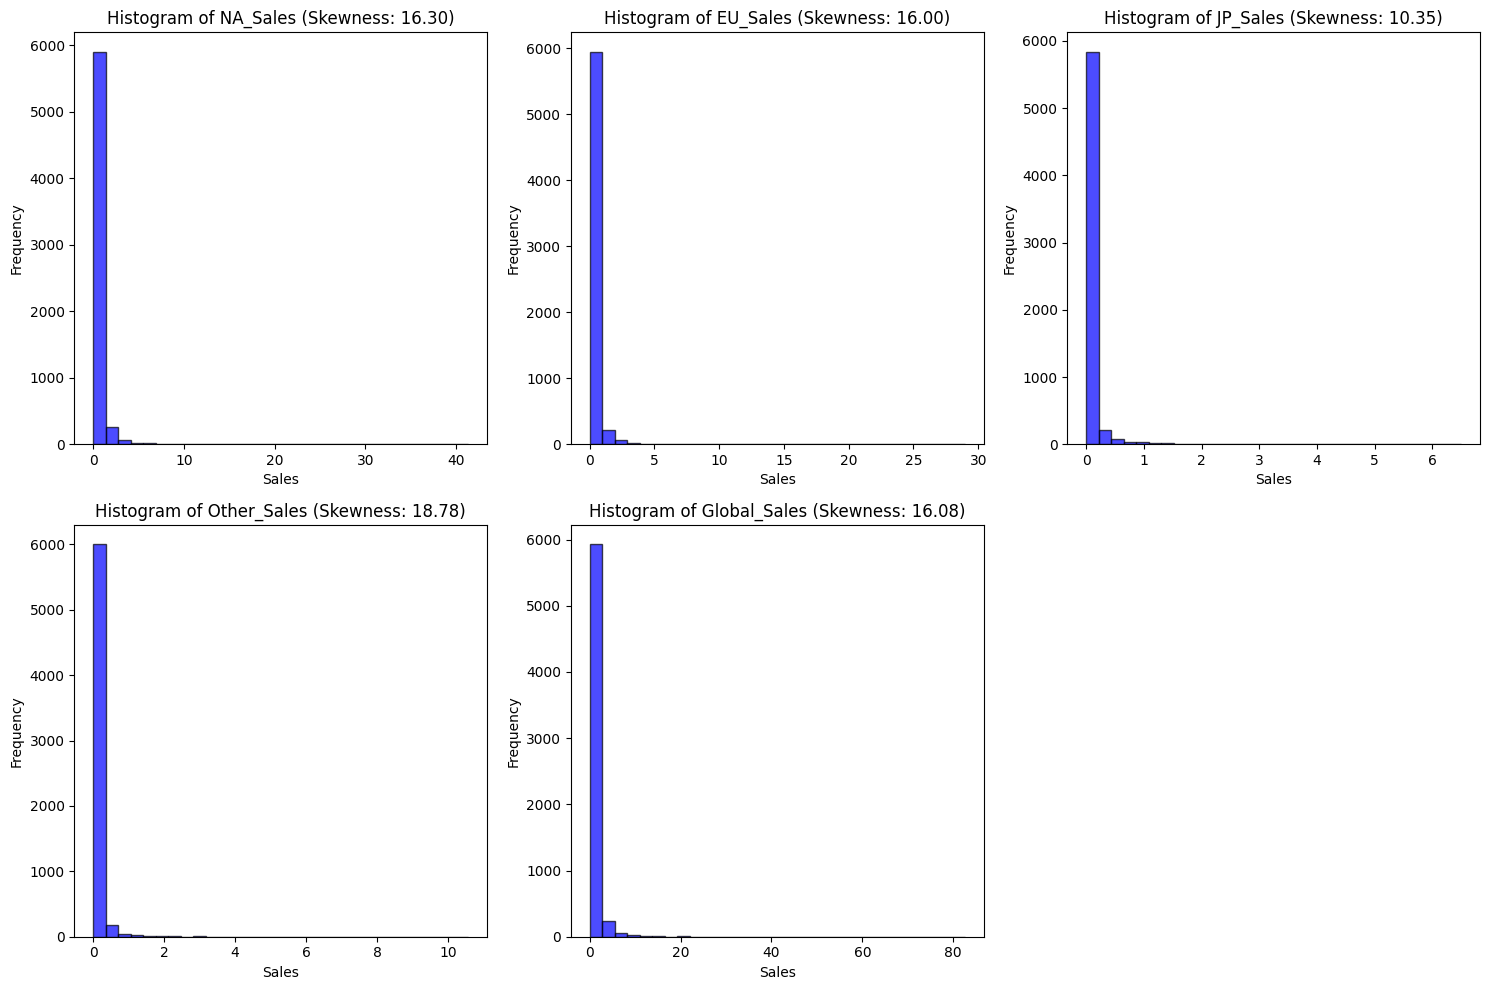

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()


sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


for i, col in enumerate(sales_columns):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col} (Skewness: {df[col].skew():.2f})')
    axes[i].set_xlabel('Sales')
    axes[i].set_ylabel('Frequency')


axes[-1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# # 'NA_Sales_up'


df_up['NA_Sales'] = np.sqrt(df['NA_Sales'])
df_up['EU_Sales'] = np.sqrt(df['EU_Sales'])
df_up['JP_Sales'] = np.sqrt(df['JP_Sales'])
df_up['Other_Sales'] = np.sqrt(df['Other_Sales'])
df_up['Global_Sales'] = np.sqrt(df['Global_Sales'])

print("Skewness after square root transformation:")
print("NA_Sales_up:", df_log['NA_Sales'].skew())
print("EU_Sales_up:", df_log['EU_Sales'].skew())
print("JP_Sales_up:", df_log['JP_Sales'].skew())
print("Other_Sales_up:", df_log['Other_Sales'].skew())
print("Global_Sales_up:", df_log['Global_Sales'].skew())


Skewness after square root transformation:
NA_Sales_up: 16.303445688992323
EU_Sales_up: 15.996366146512738
JP_Sales_up: 10.346371716299924
Other_Sales_up: 18.784521642217946
Global_Sales_up: 16.083441169411934


In [ ]:
df_log['NA_Sales'] = np.log1p(df['NA_Sales'])
df_log['EU_Sales'] = np.log1p(df['EU_Sales'])
df_log['JP_Sales'] = np.log1p(df['JP_Sales'])
df_log['Other_Sales'] = np.log1p(df['Other_Sales'])
df_log['Global_Sales'] = np.log1p(df['Global_Sales'])

df_up_log['NA_Sales'] = np.log1p(df_up['NA_Sales'])
df_up_log['EU_Sales'] = np.log1p(df_up['EU_Sales'])
df_up_log['JP_Sales'] = np.log1p(df_up['JP_Sales'])
df_up_log['Other_Sales'] = np.log1p(df_up['Other_Sales'])
df_up_log['Global_Sales'] = np.log1p(df_up['Global_Sales'])


print("Skewness after square root transformation:")
print("NA_Sales_log:", df_log['NA_Sales'].skew())
print("EU_Sales_log:", df_log['EU_Sales'].skew())
print("JP_Sales_log:", df_log['JP_Sales'].skew())
print("Other_Sales_log:", df_log['Other_Sales'].skew())
print("Global_Sales_log:", df_log['Global_Sales'].skew())

print("Skewness after square root transformation:")
print("NA_Sales_log:", df_up_log['NA_Sales'].skew())
print("EU_Sales_log:", df_up_log['EU_Sales'].skew())
print("JP_Sales_log:", df_up_log['JP_Sales'].skew())
print("Other_Sales_log:", df_up_log['Other_Sales'].skew())
print("Global_Sales_log:", df_up_log['Global_Sales'].skew())

Skewness after square root transformation:
NA_Sales_log: 2.7416065151898827
EU_Sales_log: 3.51362377684296
JP_Sales_log: 5.943589020472716
Other_Sales_log: 5.884773404115754
Global_Sales_log: 2.216527291553181
Skewness after square root transformation:
NA_Sales_log: 0.9733704454994855
EU_Sales_log: 1.3019304292189462
JP_Sales_log: 2.571666414098536
Other_Sales_log: 1.6589035318175656
Global_Sales_log: 1.188008922610024


In [ ]:
# df['NA_Sales'] = np.sqrt(df['NA_Sales'])
# df['EU_Sales'] = np.sqrt(df['EU_Sales'])
# df['JP_Sales'] = np.sqrt(df['JP_Sales'])
# df['Other_Sales'] = np.sqrt(df['Other_Sales'])
# df['Global_Sales'] = np.sqrt(df['Global_Sales'])
# df['NA_Sales'] = np.log1p(df['NA_Sales'])
# df['EU_Sales'] = np.log1p(df['EU_Sales'])
# df['JP_Sales'] = np.log1p(df['JP_Sales'])
# df['Other_Sales'] = np.log1p(df['Other_Sales'])
# df['Global_Sales'] = np.log1p(df['Global_Sales'])

In [ ]:
print("NA_Sales_log:", df['NA_Sales'].skew())
print("EU_Sales_log:", df['EU_Sales'].skew())
print("JP_Sales_log:", df['JP_Sales'].skew())
print("Other_Sales_log:", df['Other_Sales'].skew())
print("Global_Sales_log:", df['Global_Sales'].skew())

NA_Sales_log: 16.303445688992323
EU_Sales_log: 15.996366146512738
JP_Sales_log: 10.346371716299924
Other_Sales_log: 18.784521642217946
Global_Sales_log: 16.083441169411934


In [ ]:
df['JP_Sales']

0       3.77
1       3.79
2       3.28
3       6.50
4       2.93
        ... 
7210    0.00
7211    0.00
7212    0.00
7213    0.00
7216    0.00
Name: JP_Sales, Length: 6268, dtype: float64

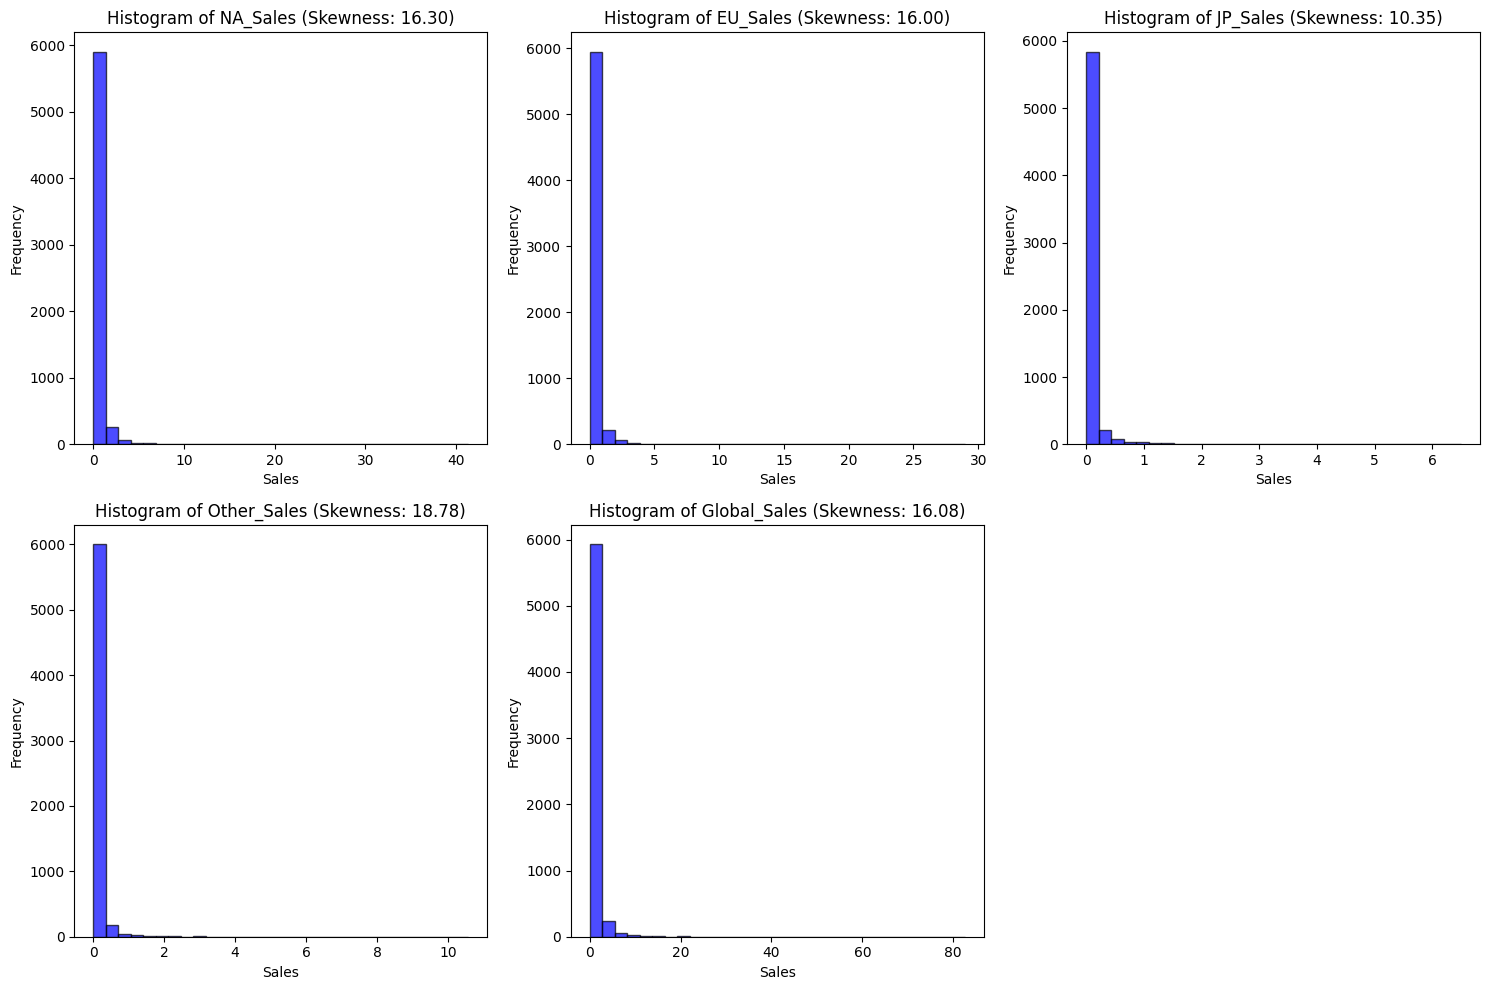

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(15, 10))


axes = axes.flatten()


sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for i, col in enumerate(sales_columns):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col} (Skewness: {df[col].skew():.2f})')
    axes[i].set_xlabel('Sales')
    axes[i].set_ylabel('Frequency')


axes[-1].axis('off')

plt.tight_layout()
plt.show()


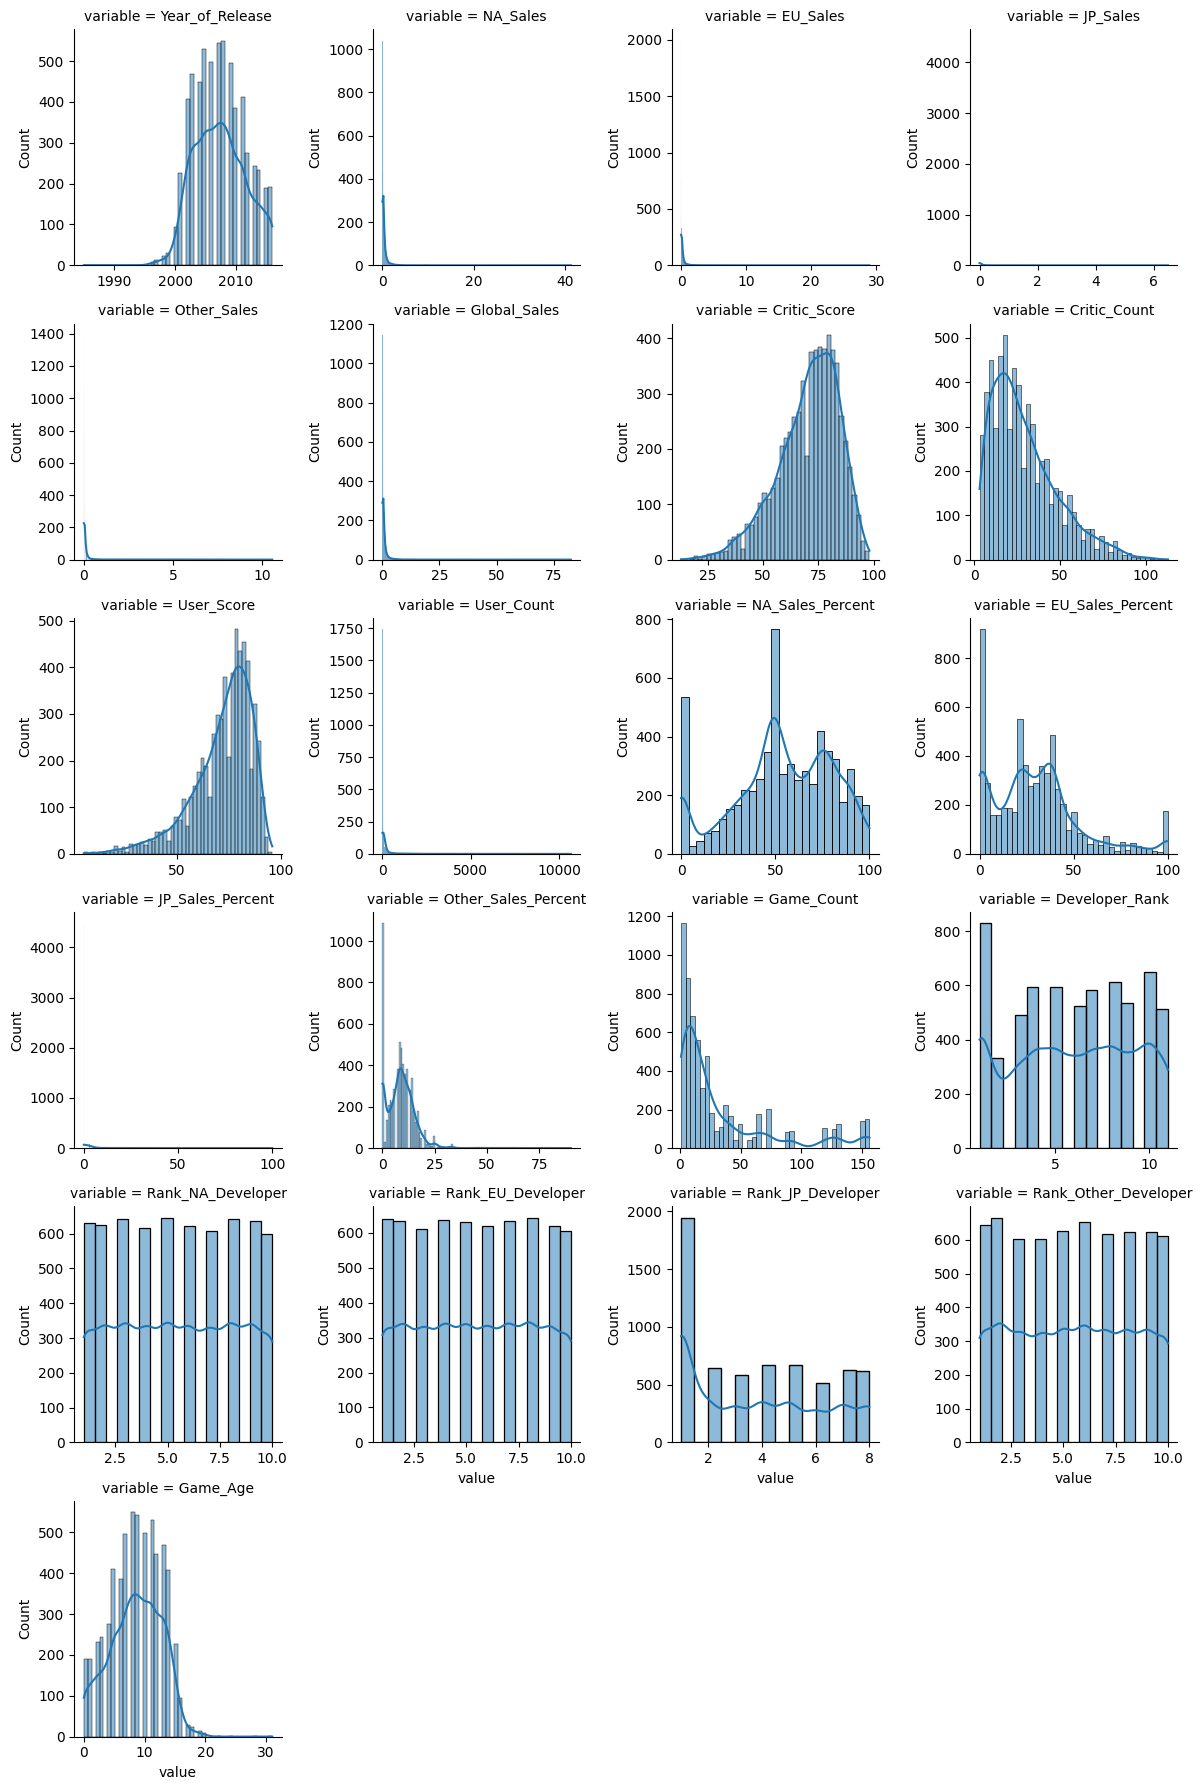

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

num_columns = df.select_dtypes(include=['float64', 'int64']).columns


melted_df = pd.melt(df, value_vars=num_columns)


facet_grid = sns.FacetGrid(melted_df, col='variable', col_wrap=4, sharex=False, sharey=False)


facet_grid.map(sns.histplot, 'value', kde=True)


plt.show()


In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 6268 entries, 0 to 7216
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  6268 non-null   object 
 1   Platform              6268 non-null   object 
 2   Year_of_Release       6268 non-null   int64  
 3   Genre                 6268 non-null   object 
 4   Publisher             6268 non-null   object 
 5   NA_Sales              6268 non-null   float64
 6   EU_Sales              6268 non-null   float64
 7   JP_Sales              6268 non-null   float64
 8   Other_Sales           6268 non-null   float64
 9   Global_Sales          6268 non-null   float64
 10  Critic_Score          6268 non-null   float64
 11  Critic_Count          6268 non-null   float64
 12  User_Score            6268 non-null   int64  
 13  User_Count            6268 non-null   float64
 14  Developer             6268 non-null   object 
 15  Rating                6217

In [ ]:
df.iloc[1]

Name                    Mario Kart Wii
Platform                           Wii
Year_of_Release                   2008
Genre                           Racing
Publisher                     Nintendo
NA_Sales                         15.68
EU_Sales                         12.76
JP_Sales                          3.79
Other_Sales                       3.29
Global_Sales                     35.52
Critic_Score                      82.0
Critic_Count                      73.0
User_Score                          83
User_Count                       709.0
Developer                     Nintendo
Rating                               E
NA_Sales_Percent                    44
EU_Sales_Percent                    36
JP_Sales_Percent                    11
Other_Sales_Percent                  9
Game_Count                          72
Developer_Rank                      10
Rank_NA_Developer                   10
Rank_EU_Developer                   10
Rank_JP_Developer                    8
Rank_Other_Developer     

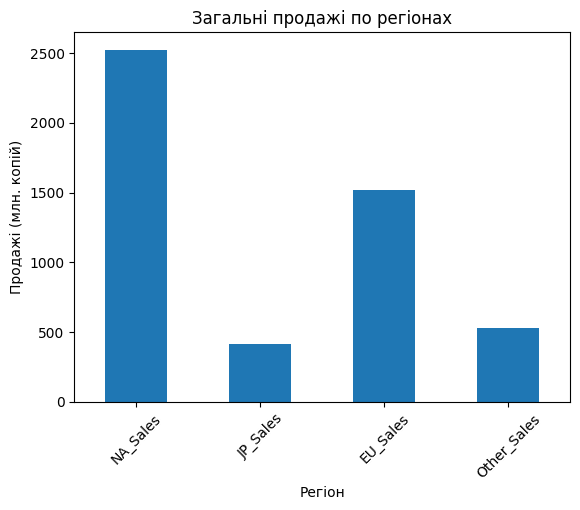

In [ ]:
sales_by_region = df[['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']].sum()
sales_by_region.plot(kind='bar')
plt.title('Загальні продажі по регіонах')
plt.ylabel('Продажі (млн. копій)')
plt.xlabel('Регіон')
plt.xticks(rotation=45)
plt.show()

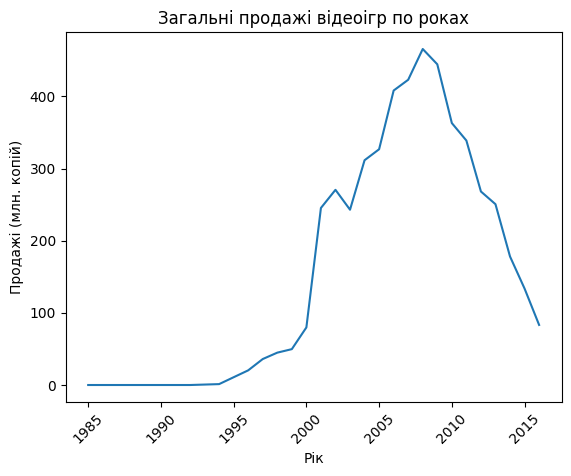

In [ ]:
sales_by_year = df.groupby('Year_of_Release')['Global_Sales'].sum()
sales_by_year.plot(kind='line')
plt.title('Загальні продажі відеоігр по роках')
plt.ylabel('Продажі (млн. копій)')
plt.xlabel('Рік')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np

numeric_columns = df.select_dtypes(include=[np.number]).columns


df_numeric = df[numeric_columns]
print(df_numeric)

      Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                2006     41.36     28.96      3.77         8.45   
1                2008     15.68     12.76      3.79         3.29   
2                2009     15.61     10.93      3.28         2.95   
3                2006     11.28      9.14      6.50         2.88   
4                2006     13.96      9.18      2.93         2.84   
...               ...       ...       ...       ...          ...   
7210             2005      0.01      0.01      0.00         0.00   
7211             2009      0.01      0.00      0.00         0.00   
7212             2010      0.00      0.01      0.00         0.00   
7213             2003      0.01      0.00      0.00         0.00   
7216             2002      0.01      0.00      0.00         0.00   

      Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  ...  \
0            82.53          76.0          51.0          80       322.0  ...   
1            35.52       

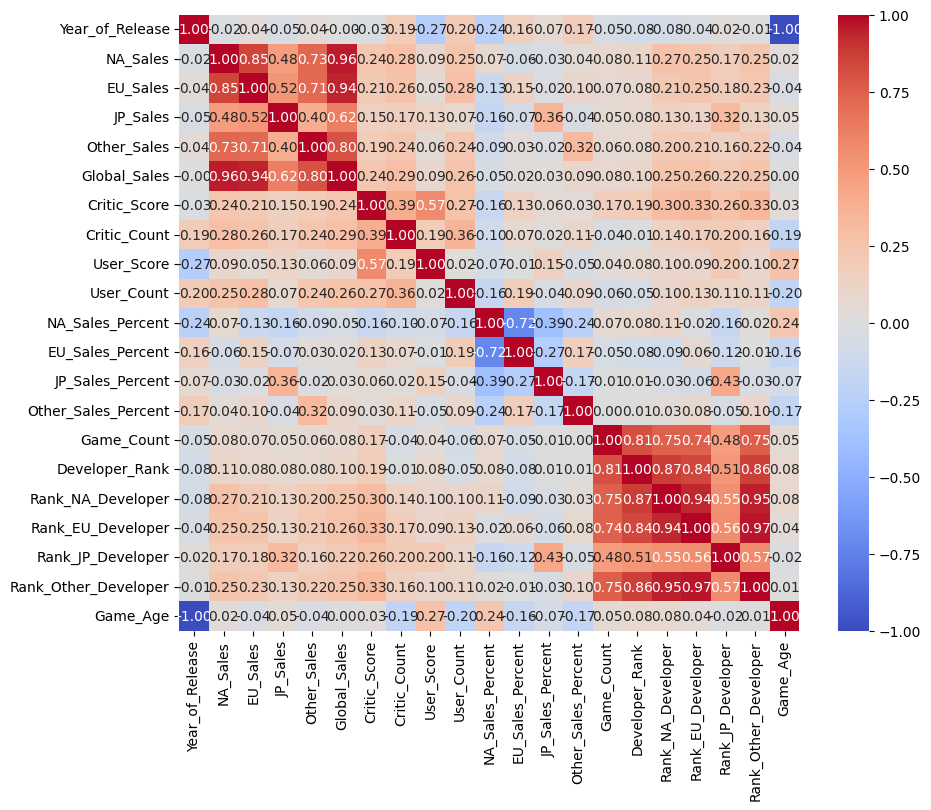

In [ ]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:

platforms_to_keep = ['PS3', 'PS4', 'X360', 'XOne', 'PC', 'Wii','WiiU','PS2','DS','PSP','PS','PC','XB','GBA','GC']


filtered_df = df[df['Platform'].isin(platforms_to_keep)]


print(filtered_df.shape)
filtered_df.head()


(6030, 27)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,EU_Sales_Percent,JP_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_NA_Developer,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,35,5,10,72,10,10,10,8,10,10
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,36,11,9,72,10,10,10,8,10,8
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,33,10,9,72,10,10,10,8,10,7
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,...,31,22,10,72,10,10,10,8,10,10
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,...,32,10,10,72,10,10,10,8,10,10


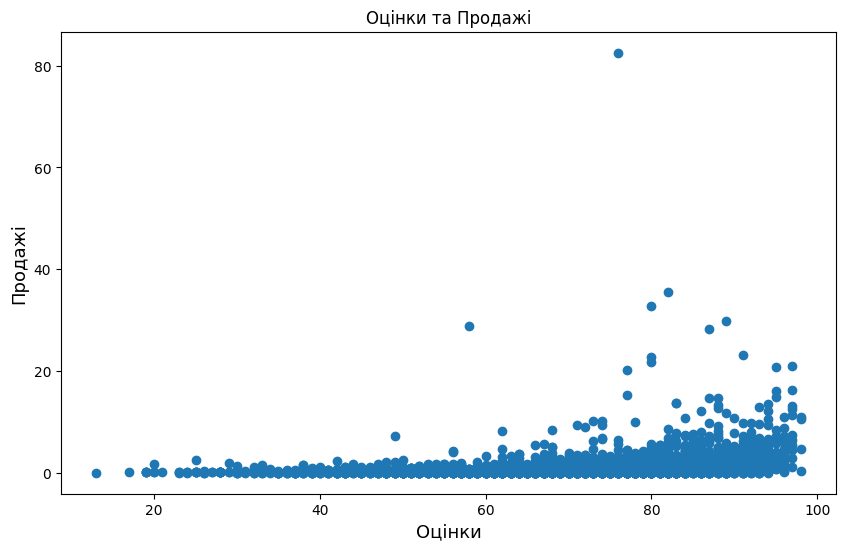

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Critic_Score'], y=df['Global_Sales'])
plt.title('Оцінки та Продажі')
plt.ylabel('Продажі', fontsize=13)
plt.xlabel('Оцінки', fontsize=13)
plt.show()

In [ ]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,EU_Sales_Percent,JP_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_NA_Developer,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age
count,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000,6268.00000,6268.000000,6268.000000,6268.000000,...,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000,6268.000000
mean,2007.395820,0.402513,0.241884,0.066345,0.084631,0.795568,70.65268,29.138641,71.993618,178.593650,...,29.438098,7.109126,8.886567,33.110243,5.976548,5.479898,5.477026,3.736758,5.466816,8.604180
std,4.202907,0.981369,0.707374,0.296490,0.278286,2.009933,13.73177,19.130069,14.328854,601.405335,...,23.316736,18.093085,7.413179,40.996228,3.210590,2.864987,2.867192,2.478555,2.878534,4.202907
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.00000,3.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.120000,63.00000,15.000000,65.000000,11.000000,...,12.000000,0.000000,4.000000,6.000000,3.000000,3.000000,3.000000,1.000000,3.000000,6.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.300000,73.00000,25.000000,75.000000,28.000000,...,27.000000,0.000000,9.000000,16.000000,6.000000,5.000000,5.000000,3.000000,5.000000,9.000000
75%,2010.000000,0.400000,0.210000,0.010000,0.070000,0.780000,81.00000,40.000000,82.000000,92.000000,...,39.000000,1.000000,12.000000,42.000000,9.000000,8.000000,8.000000,6.000000,8.000000,12.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.00000,113.000000,96.000000,10665.000000,...,100.000000,100.000000,90.000000,156.000000,11.000000,10.000000,10.000000,8.000000,10.000000,31.000000


In [ ]:
print(df.isnull().sum())

Name                     0
Platform                 0
Year_of_Release          0
Genre                    0
Publisher                0
NA_Sales                 0
EU_Sales                 0
JP_Sales                 0
Other_Sales              0
Global_Sales             0
Critic_Score             0
Critic_Count             0
User_Score               0
User_Count               0
Developer                0
Rating                  51
NA_Sales_Percent         0
EU_Sales_Percent         0
JP_Sales_Percent         0
Other_Sales_Percent      0
Game_Count               0
Developer_Rank           0
Rank_NA_Developer        0
Rank_EU_Developer        0
Rank_JP_Developer        0
Rank_Other_Developer     0
Game_Age                 0
dtype: int64


999 Dummies, encoding


In [ ]:
df_dum= df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()


df_encoded2 = df.copy()


encoders2 = {}


for column in ['Publisher', 'Developer','Genre']:
    le2 = LabelEncoder()
    df_encoded2[column] = le2.fit_transform(df_dum[column])
    encoders2[column] = le2


print("Unique values for 'Platform' after encoding:", df_encoded2['Platform'].unique())
print("Unique values for 'Genre' after encoding:", df_encoded2['Genre'].unique())
print("Unique values for 'Publisher' after encoding:", df_encoded2['Publisher'].unique())


df_encoded2.head()

df_dum = df_encoded2

Unique values for 'Platform' after encoding: ['Wii' 'DS' 'WiiU' 'GC' 'GBA' 'PS3' 'PS2' 'X360' 'PS4' 'XOne' 'XB' 'PC'
 'PS' 'PSP']
Unique values for 'Genre' after encoding: [ 6 10  4  3  5  9  0  8 11  1  2  7]
Unique values for 'Publisher' after encoding: [132 189 167   9 164  99 175  56 202  76 119 177  53  36 174  16 103  84
 156  21 209 107 129 169 120  90  10  65 186 207  29  52  48 203   2 187
 153 109  79 204  91 206 205 141  74 115  60  57 173  39 188  70  33  44
   6  87 165 151 117  89  61 135  32 127 111 192 148  67 133  19  69  12
 123 217 118  46 136 152 154 108  22  63 172  97 220  75 160 158  71 142
  38 170 149  92  54  23 171  31 176  72  17 146  80 144 210 197  59 168
  66 196 101  85  45 190 150 191 166  81 214 185 130  15 102 113 213 198
 162  13  96  88 100  98 199 145  50 183 179 194 157  35  14  83 195   5
 106  51  68  34  77 122 121   1 215 161  40  82 211  30 139  62 221  58
 155  41  86 128  11 147   4 218  27   0 110  94 219   3  26 201  64  95
 114 163 184 2

In [ ]:
le = LabelEncoder()

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
df.dropna(subset=['Rating'], inplace=True)

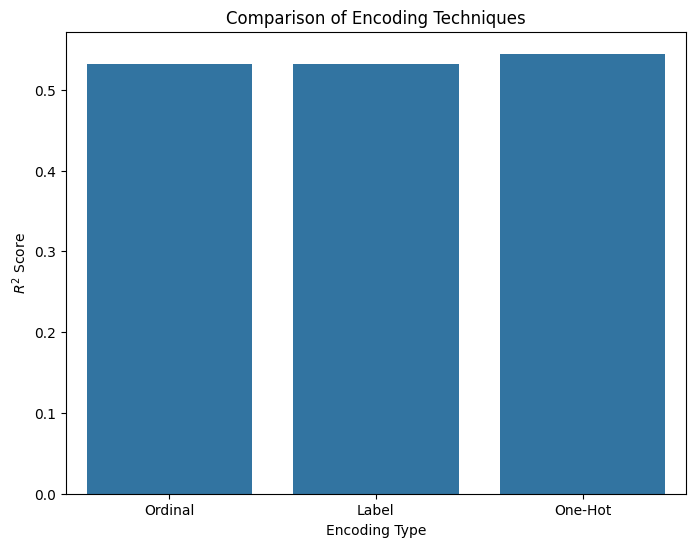

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
ordinal_columns = ['Publisher', 'Developer', 'Genre', 'Platform',"Rating"]
ordinal_encoder = OrdinalEncoder()



df_ordinal = df.copy()

df_ordinal[ordinal_columns] = ordinal_encoder.fit_transform(df_ordinal[ordinal_columns])
df_label = df.copy()
label_encoder = LabelEncoder()


for col in ordinal_columns:
    df_label[col] = label_encoder.fit_transform(df_label[col])
df_one_hot = pd.get_dummies(df, columns=ordinal_columns)
columns_to_drop = ['NA_Sales', 'EU_Sales', 'Other_Sales', 'JP_Sales','Name']
df_ordinal.drop(columns=columns_to_drop, inplace=True)
df_label.drop(columns=columns_to_drop, inplace=True)
df_one_hot.drop(columns=columns_to_drop, inplace=True)


def train_and_evaluate(df):
    X = df.drop('Global_Sales', axis=1)
    y = df['Global_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)


r2_ordinal = train_and_evaluate(df_ordinal)
r2_label = train_and_evaluate(df_label)
r2_one_hot = train_and_evaluate(df_one_hot)
import matplotlib.pyplot as plt


results = {
    'Encoding Type': ['Ordinal', 'Label', 'One-Hot'],
    'R2 Score': [r2_ordinal, r2_label, r2_one_hot]
}

result_df = pd.DataFrame(results)


plt.figure(figsize=(8, 6))
sns.barplot(x='Encoding Type', y='R2 Score', data=result_df)
plt.title('Comparison of Encoding Techniques')
plt.ylabel('$R^2$ Score')
plt.xlabel('Encoding Type')
plt.show()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df_ordinal2 = df_up.copy()
df_ordinal3 = df_log.copy()
df_ordinal4 = df_up_log.copy()


ordinal_encoder = OrdinalEncoder()


ordinal_columns = ['Publisher', 'Developer', 'Genre', 'Platform']


df_ordinal2[ordinal_columns] = ordinal_encoder.fit_transform(df_ordinal2[ordinal_columns])
df_ordinal3[ordinal_columns] = ordinal_encoder.fit_transform(df_ordinal3[ordinal_columns])
df_ordinal4[ordinal_columns] = ordinal_encoder.fit_transform(df_ordinal4[ordinal_columns])

df_up=df_ordinal2
df_log=df_ordinal3
df_up_log=df_ordinal4

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


df_ordinal = df.copy()


ordinal_encoder = OrdinalEncoder()


ordinal_columns = ['Publisher', 'Developer', 'Genre', 'Platform']


df_ordinal[ordinal_columns] = ordinal_encoder.fit_transform(df_ordinal[ordinal_columns])


print(df_ordinal.head())
print(df_ordinal.shape)


print("Unique ordinal values for 'Platform':", df_ordinal['Platform'].unique())

df=df_ordinal


                        Name  Platform  Year_of_Release  Genre  Publisher  \
1             Mario Kart Wii       9.0             2008    6.0      128.0   
2          Wii Sports Resort       9.0             2009   10.0      128.0   
3      New Super Mario Bros.       0.0             2006    4.0      128.0   
4                   Wii Play       9.0             2006    3.0      128.0   
5  New Super Mario Bros. Wii       9.0             2009    4.0      128.0   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  ...  \
1     15.68     12.76      3.79         3.29         35.52  ...   
2     15.61     10.93      3.28         2.95         32.77  ...   
3     11.28      9.14      6.50         2.88         29.80  ...   
4     13.96      9.18      2.93         2.84         28.92  ...   
5     14.44      6.94      4.70         2.24         28.32  ...   

   EU_Sales_Percent  JP_Sales_Percent  Other_Sales_Percent  Game_Count  \
1                36                11                    9  

In [ ]:
import json
category_mappings = {}
for col, categories in zip(ordinal_columns, ordinal_encoder.categories_):
    category_mappings[col] = {category: int(code) for code, category in enumerate(categories)}

with open('category_mappings.json', 'w') as f:
    json.dump(category_mappings, f, indent=4)

print("Category mappings:", category_mappings)

Category mappings: {'Publisher': {'10TACLE Studios': 0, '3DO': 1, '505 Games': 2, '5pb': 3, 'AQ Interactive': 4, 'ASCII Entertainment': 5, 'Acclaim Entertainment': 6, 'Ackkstudios': 7, 'Acquire': 8, 'Activision': 9, 'Activision Blizzard': 10, 'Activision Value': 11, 'Aksys Games': 12, 'Arc System Works': 13, 'Ascaron Entertainment GmbH': 14, 'Aspyr': 15, 'Atari': 16, 'Atlus': 17, 'Avalon Interactive': 18, 'BAM! Entertainment': 19, 'Banpresto': 20, 'Bethesda Softworks': 21, 'Bigben Interactive': 22, 'Black Label Games': 23, 'Blue Byte': 24, 'Bohemia Interactive': 25, 'Brash Entertainment': 26, 'CCP': 27, 'CDV Software Entertainment': 28, 'Capcom': 29, 'Cave': 30, 'City Interactive': 31, 'Cloud Imperium Games Corporation': 32, 'Codemasters': 33, 'Compile Heart': 34, 'Conspiracy Entertainment': 35, 'Crave Entertainment': 36, 'Crimson Cow': 37, 'D3Publisher': 38, 'DHM Interactive': 39, 'DTP Entertainment': 40, 'Deep Silver': 41, 'Destination Software, Inc': 42, 'Destineer': 43, 'Devolver D

In [ ]:
df_noup=df.copy()

In [ ]:
df_noup.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,EU_Sales_Percent,JP_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_NA_Developer,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age
1,Mario Kart Wii,9.0,2008,6.0,128.0,15.68,12.76,3.79,3.29,35.52,...,36,11,9,72,10,10,10,8,10,8
2,Wii Sports Resort,9.0,2009,10.0,128.0,15.61,10.93,3.28,2.95,32.77,...,33,10,9,72,10,10,10,8,10,7
3,New Super Mario Bros.,0.0,2006,4.0,128.0,11.28,9.14,6.50,2.88,29.80,...,31,22,10,72,10,10,10,8,10,10
4,Wii Play,9.0,2006,3.0,128.0,13.96,9.18,2.93,2.84,28.92,...,32,10,10,72,10,10,10,8,10,10
5,New Super Mario Bros. Wii,9.0,2009,4.0,128.0,14.44,6.94,4.70,2.24,28.32,...,25,17,8,72,10,10,10,8,10,7


In [ ]:
df_encoded_noup = df_noup.copy()


categorical_columns = ['Publisher', 'Developer','Genre','Platform']
for column in categorical_columns:
    df_encoded_noup[column] = le.fit_transform(df_encoded_noup[column])
print("Unique values for 'Platform' after encoding:", df_encoded_noup['Platform'].unique())


df_noup = df_encoded_noup

Unique values for 'Platform' after encoding: [ 9  0 10  2  1  6  5 11  7 13 12  3  4  8]


In [ ]:

df_noup.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,EU_Sales_Percent,JP_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_NA_Developer,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age
1,Mario Kart Wii,9,2008,6,128,15.68,12.76,3.79,3.29,35.52,...,36,11,9,72,10,10,10,8,10,8
2,Wii Sports Resort,9,2009,10,128,15.61,10.93,3.28,2.95,32.77,...,33,10,9,72,10,10,10,8,10,7
3,New Super Mario Bros.,0,2006,4,128,11.28,9.14,6.50,2.88,29.80,...,31,22,10,72,10,10,10,8,10,10
4,Wii Play,9,2006,3,128,13.96,9.18,2.93,2.84,28.92,...,32,10,10,72,10,10,10,8,10,10
5,New Super Mario Bros. Wii,9,2009,4,128,14.44,6.94,4.70,2.24,28.32,...,25,17,8,72,10,10,10,8,10,7


In [ ]:
df_noup=df_noup.drop(columns=['Name'])

In [ ]:
df_noup=df_noup.drop(columns=['Rating'])

In [ ]:
df['Rating'].unique()

array(['E', 'T', 'E10+', 'M', 'AO', 'K-A'], dtype=object)

In [ ]:
import pandas as pd


print(f"Shape before dummies: {df.shape}")


df_dummies = pd.get_dummies(df, columns=['Rating'])
df_dummies2 = pd.get_dummies(df_up, columns=['Rating'])
df_dummies3 = pd.get_dummies(df_log, columns=['Rating'])
df_dummies4 = pd.get_dummies(df_up_log, columns=['Rating'])

print(f"Shape after dummies: {df_dummies.shape}")


df_dummies.head()
df=df_dummies.copy()
df_up=df_dummies2.copy()
df_log=df_dummies3.copy()
df_up_log=df_dummies4.copy()

Shape before dummies: (5979, 26)
Shape after dummies: (5979, 31)


In [ ]:
df_dum.drop(columns=['Name'])

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,EU_Sales_Percent,JP_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_NA_Developer,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age
1,Wii,2008,6,132,15.68,12.76,3.79,3.29,35.52,82.0,...,36,11,9,72,10,10,10,8,10,8
2,Wii,2009,10,132,15.61,10.93,3.28,2.95,32.77,80.0,...,33,10,9,72,10,10,10,8,10,7
3,DS,2006,4,132,11.28,9.14,6.50,2.88,29.80,89.0,...,31,22,10,72,10,10,10,8,10,10
4,Wii,2006,3,132,13.96,9.18,2.93,2.84,28.92,58.0,...,32,10,10,72,10,10,10,8,10,10
5,Wii,2009,4,132,14.44,6.94,4.70,2.24,28.32,87.0,...,25,17,8,72,10,10,10,8,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7210,PS2,2005,4,97,0.01,0.01,0.00,0.00,0.02,58.0,...,50,0,0,2,1,1,1,1,1,11
7211,PC,2009,9,141,0.01,0.00,0.00,0.00,0.02,72.0,...,0,0,0,1,1,1,1,1,1,7
7212,PC,2010,11,112,0.00,0.01,0.00,0.00,0.02,70.0,...,50,0,0,1,1,1,1,1,1,6
7213,XB,2003,6,55,0.01,0.00,0.00,0.00,0.01,45.0,...,0,0,0,2,1,1,1,1,1,13


In [ ]:
print(f"Shape before dummies: {df.shape}")


df_dum = pd.get_dummies(df_dum, columns=['Rating','Platform'])


print(f"Shape after dummies: {df_dum.shape}")


df_dum.head()


Shape before dummies: (5979, 31)
Shape after dummies: (6029, 45)


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
1,Mario Kart Wii,2008,6,132,15.68,12.76,3.79,3.29,35.52,82.0,...,False,False,False,False,False,True,False,False,False,False
2,Wii Sports Resort,2009,10,132,15.61,10.93,3.28,2.95,32.77,80.0,...,False,False,False,False,False,True,False,False,False,False
3,New Super Mario Bros.,2006,4,132,11.28,9.14,6.50,2.88,29.80,89.0,...,False,False,False,False,False,False,False,False,False,False
4,Wii Play,2006,3,132,13.96,9.18,2.93,2.84,28.92,58.0,...,False,False,False,False,False,True,False,False,False,False
5,New Super Mario Bros. Wii,2009,4,132,14.44,6.94,4.70,2.24,28.32,87.0,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_dum.drop(columns='Name')

,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
1,2008,6,132,15.68,12.76,3.79,3.29,35.52,82.0,73.0,...,False,False,False,False,False,True,False,False,False,False
2,2009,10,132,15.61,10.93,3.28,2.95,32.77,80.0,73.0,...,False,False,False,False,False,True,False,False,False,False
3,2006,4,132,11.28,9.14,6.50,2.88,29.80,89.0,65.0,...,False,False,False,False,False,False,False,False,False,False
4,2006,3,132,13.96,9.18,2.93,2.84,28.92,58.0,41.0,...,False,False,False,False,False,True,False,False,False,False
5,2009,4,132,14.44,6.94,4.70,2.24,28.32,87.0,80.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7210,2005,4,97,0.01,0.01,0.00,0.00,0.02,58.0,12.0,...,False,True,False,False,False,False,False,False,False,False
7211,2009,9,141,0.01,0.00,0.00,0.00,0.02,72.0,31.0,...,False,False,False,False,False,False,False,False,False,False
7212,2010,11,112,0.00,0.01,0.00,0.00,0.02,70.0,6.0,...,False,False,False,False,False,False,False,False,False,False
7213,2003,6,55,0.01,0.00,0.00,0.00,0.01,45.0,9.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
for column in df_dummies.columns:
    print(column)

Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
NA_Sales_Percent
EU_Sales_Percent
JP_Sales_Percent
Other_Sales_Percent
Game_Count
Developer_Rank
Rank_NA_Developer
Rank_EU_Developer
Rank_JP_Developer
Rank_Other_Developer
Game_Age
Rating_AO
Rating_E
Rating_E10+
Rating_K-A
Rating_M
Rating_T


In [ ]:
df.var()

Platform                    13.883691
Year_of_Release             16.735377
Genre                       14.581216
Publisher                 4452.555301
NA_Sales                     0.717690
EU_Sales                     0.380844
JP_Sales                     0.082541
Other_Sales                  0.069100
Global_Sales                 3.052250
Critic_Score               190.617050
Critic_Count               362.890305
User_Score                 207.568233
User_Count              377488.688802
Developer                64085.124556
NA_Sales_Percent           681.244689
EU_Sales_Percent           532.123138
JP_Sales_Percent           257.368900
Other_Sales_Percent         55.233026
Game_Count                1705.745386
Developer_Rank              10.292758
Rank_NA_Developer            8.141276
Rank_EU_Developer            8.175209
Rank_JP_Developer            6.082168
Rank_Other_Developer         8.263715
Game_Age                    16.735377
Rating_AO                    0.000167
Rating_E    

In [ ]:
df_dum.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
1,Mario Kart Wii,2008,6,132,15.68,12.76,3.79,3.29,35.52,82.0,...,False,False,False,False,False,True,False,False,False,False
2,Wii Sports Resort,2009,10,132,15.61,10.93,3.28,2.95,32.77,80.0,...,False,False,False,False,False,True,False,False,False,False
3,New Super Mario Bros.,2006,4,132,11.28,9.14,6.50,2.88,29.80,89.0,...,False,False,False,False,False,False,False,False,False,False
4,Wii Play,2006,3,132,13.96,9.18,2.93,2.84,28.92,58.0,...,False,False,False,False,False,True,False,False,False,False
5,New Super Mario Bros. Wii,2009,4,132,14.44,6.94,4.70,2.24,28.32,87.0,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df2=df.copy()

In [ ]:

for column in df.columns:
    print(column)

Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
NA_Sales_Percent
EU_Sales_Percent
JP_Sales_Percent
Other_Sales_Percent
Game_Count
Developer_Rank
Rank_NA_Developer
Rank_EU_Developer
Rank_JP_Developer
Rank_Other_Developer
Game_Age
Rating_AO
Rating_E
Rating_E10+
Rating_K-A
Rating_M
Rating_T


In [ ]:
data_clean.head().sort_values(by='Global_Sales',ascending=False)

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_T
39,0.0,2010,5.0,128.0,1.63,0.51,0.35,0.18,2.67,79.0,...,10,8,10,6,False,True,False,False,False,False
40,1.0,2001,4.0,128.0,0.90,0.73,0.54,0.09,2.26,88.0,...,10,8,10,15,False,True,False,False,False,False
41,10.0,2013,4.0,128.0,1.25,0.62,0.18,0.18,2.24,77.0,...,10,8,10,3,False,True,False,False,False,False
42,0.0,2006,5.0,128.0,0.63,0.05,1.35,0.08,2.10,84.0,...,10,8,10,10,False,True,False,False,False,False
43,1.0,2002,0.0,128.0,1.18,0.27,0.17,0.06,1.68,92.0,...,10,8,10,14,False,True,False,False,False,False


In [ ]:
df.head().sort_values(by='Global_Sales',ascending=False)

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_T
1,9.0,2008,6.0,128.0,15.68,12.76,3.79,3.29,35.52,82.0,...,10,8,10,8,False,True,False,False,False,False
2,9.0,2009,10.0,128.0,15.61,10.93,3.28,2.95,32.77,80.0,...,10,8,10,7,False,True,False,False,False,False
3,0.0,2006,4.0,128.0,11.28,9.14,6.50,2.88,29.80,89.0,...,10,8,10,10,False,True,False,False,False,False
4,9.0,2006,3.0,128.0,13.96,9.18,2.93,2.84,28.92,58.0,...,10,8,10,10,False,True,False,False,False,False
5,9.0,2009,4.0,128.0,14.44,6.94,4.70,2.24,28.32,87.0,...,10,8,10,7,False,True,False,False,False,False


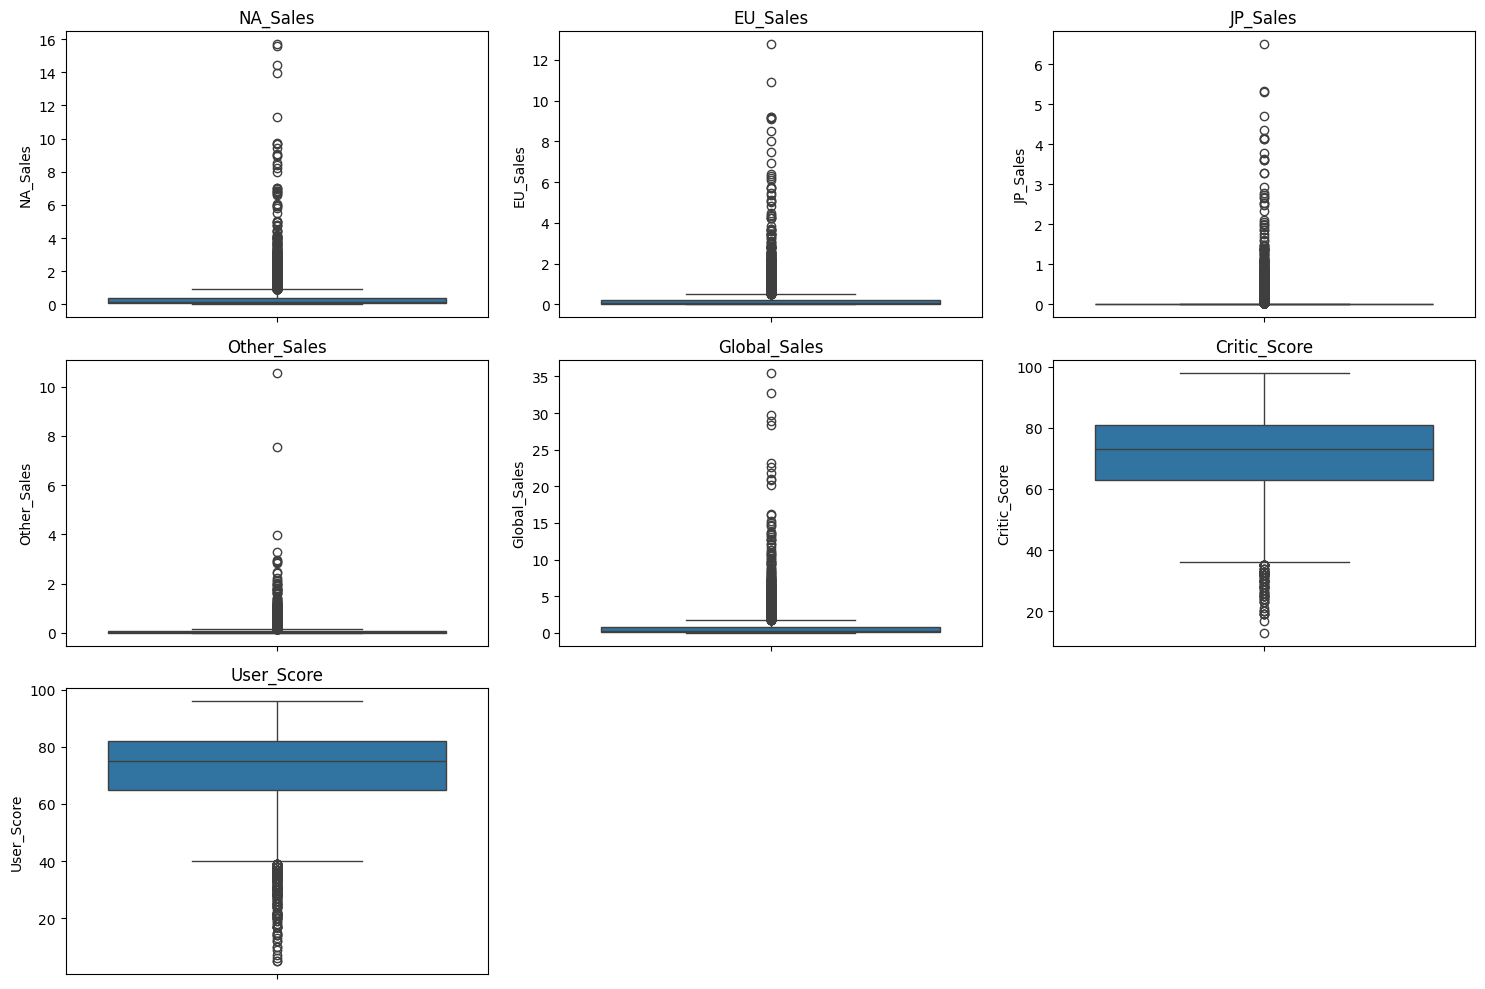

Number of outliers in 'Global_Sales': 590
Number of outliers in 'NA_Sales': 623
Number of outliers in 'EU_Sales': 655
Number of outliers in 'JP_Sales': 1200
Number of outliers in 'Other_Sales': 590


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_outliers(data, columns):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns):
        plt.subplot((len(columns) + 2) // 3, 3, i + 1)
        sns.boxplot(y = data[column])
        plt.title(column)
    plt.tight_layout()
    plt.show()


plot_outliers(df, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'User_Score'])


def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data.index[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers


outliers_global_sales = detect_outliers(df, 'Global_Sales')
print("Number of outliers in 'Global_Sales':", len(outliers_global_sales))
outliers_na_sales = detect_outliers(df, 'NA_Sales')
print("Number of outliers in 'NA_Sales':", len(outliers_na_sales))
outliers_eu_sales = detect_outliers(df, 'EU_Sales')
print("Number of outliers in 'EU_Sales':", len(outliers_eu_sales))
outliers_jp_sales = detect_outliers(df, 'JP_Sales')
print("Number of outliers in 'JP_Sales':", len(outliers_jp_sales))
outliers_other_sales = detect_outliers(df, 'Global_Sales')
print("Number of outliers in 'Other_Sales':", len(outliers_other_sales))


In [ ]:
df_cap=df.copy()

In [ ]:
df

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_T
1,9.0,2008,6.0,128.0,15.68,12.76,3.79,3.29,35.52,82.0,...,10,8,10,8,False,True,False,False,False,False
2,9.0,2009,10.0,128.0,15.61,10.93,3.28,2.95,32.77,80.0,...,10,8,10,7,False,True,False,False,False,False
3,0.0,2006,4.0,128.0,11.28,9.14,6.50,2.88,29.80,89.0,...,10,8,10,10,False,True,False,False,False,False
4,9.0,2006,3.0,128.0,13.96,9.18,2.93,2.84,28.92,58.0,...,10,8,10,10,False,True,False,False,False,False
5,9.0,2009,4.0,128.0,14.44,6.94,4.70,2.24,28.32,87.0,...,10,8,10,7,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,12.0,2005,6.0,204.0,0.01,0.00,0.00,0.00,0.02,45.0,...,1,1,1,11,False,False,False,False,False,True
7210,5.0,2005,4.0,94.0,0.01,0.01,0.00,0.00,0.02,58.0,...,1,1,1,11,False,True,False,False,False,False
7211,3.0,2009,9.0,136.0,0.01,0.00,0.00,0.00,0.02,72.0,...,1,1,1,7,False,False,False,False,False,True
7213,12.0,2003,6.0,52.0,0.01,0.00,0.00,0.00,0.01,45.0,...,1,1,1,13,False,True,False,False,False,False


In [ ]:
df_cap.head().sort_values(by='Global_Sales',ascending=False)

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_T
1,9.0,2008,6.0,128.0,15.68,12.76,3.79,3.29,35.52,82.0,...,10,8,10,8,False,True,False,False,False,False
2,9.0,2009,10.0,128.0,15.61,10.93,3.28,2.95,32.77,80.0,...,10,8,10,7,False,True,False,False,False,False
3,0.0,2006,4.0,128.0,11.28,9.14,6.50,2.88,29.80,89.0,...,10,8,10,10,False,True,False,False,False,False
4,9.0,2006,3.0,128.0,13.96,9.18,2.93,2.84,28.92,58.0,...,10,8,10,10,False,True,False,False,False,False
5,9.0,2009,4.0,128.0,14.44,6.94,4.70,2.24,28.32,87.0,...,10,8,10,7,False,True,False,False,False,False


In [ ]:
df['JP_Sales']

1       3.79
2       3.28
3       6.50
4       2.93
5       4.70
        ... 
7207    0.00
7210    0.00
7211    0.00
7213    0.00
7216    0.00
Name: JP_Sales, Length: 5979, dtype: float64

In [ ]:
df_cap2=df_dum.copy()

In [ ]:

cap2 = df_cap2['Global_Sales'].quantile(0.99)
df_cap2.loc[df_cap2['Global_Sales'] > cap2, 'Global_Sales'] = cap2

In [ ]:
df_dum=df_cap2

In [ ]:
# plot_outliers(df_cleaned, ['Global_Sales'])


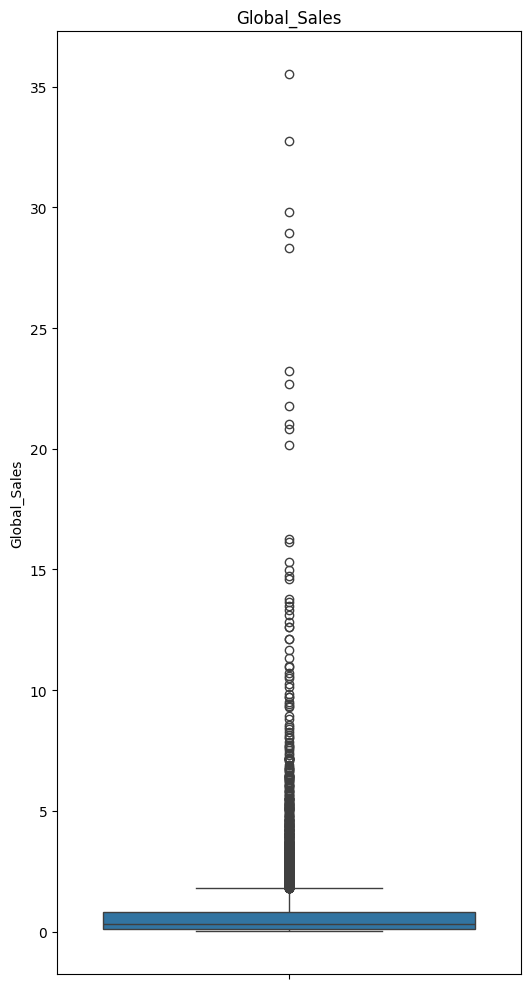

In [ ]:
plot_outliers(df_cap, ['Global_Sales'])

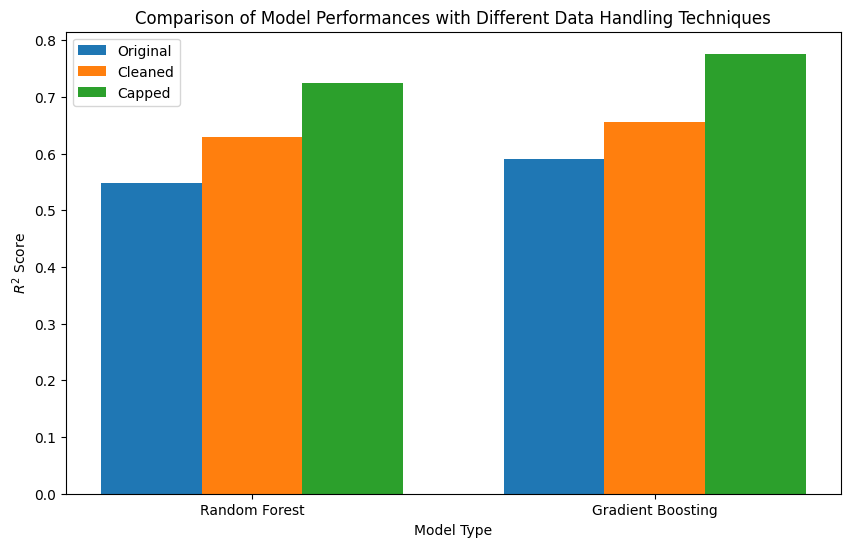

In [ ]:
columns_to_drop = ['NA_Sales', 'EU_Sales', 'Other_Sales', 'JP_Sales']

df_original = df.drop(columns=columns_to_drop)
df_cleaned = df.drop(columns=columns_to_drop).drop(outliers_global_sales)
df_cap = df.drop(columns=columns_to_drop)
cap = df_cap['Global_Sales'].quantile(0.99)
df_cap.loc[df_cap['Global_Sales'] > cap, 'Global_Sales'] = cap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

def train_models(df):
    X = df.drop('Global_Sales', axis=1)
    y = df['Global_Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_r2 = r2_score(y_test, rf_pred)


    gb_model = GradientBoostingRegressor(n_estimators=500, random_state=42, max_depth=7,max_features='sqrt')
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_test)
    gb_r2 = r2_score(y_test, gb_pred)

    return rf_r2, gb_r2


rf_r2_original, gb_r2_original = train_models(df_original)
rf_r2_cleaned, gb_r2_cleaned = train_models(df_cleaned)
rf_r2_capped, gb_r2_capped = train_models(df_cap)
import matplotlib.pyplot as plt


models = ['Random Forest', 'Gradient Boosting']
data = {'Original': [rf_r2_original, gb_r2_original],
        'Cleaned': [rf_r2_cleaned, gb_r2_cleaned],
        'Capped': [rf_r2_capped, gb_r2_capped]}

fig, ax = plt.subplots(figsize=(10, 6))


x = range(len(models))
width = 0.25
for i, (key, values) in enumerate(data.items()):
    ax.bar([p + width*i for p in x], values, width, label=key)

ax.set_xlabel('Model Type')
ax.set_ylabel('$R^2$ Score')
ax.set_title('Comparison of Model Performances with Different Data Handling Techniques')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(models)
ax.legend()

plt.show()


In [ ]:
df_log=df_log.drop(columns=['Rating_M', 'Rating_T', 'Rating_E10+', 'Rating_AO', 'Rating_K-A'])
df=df.drop(columns=['Rating_M', 'Rating_T', 'Rating_E10+', 'Rating_AO', 'Rating_K-A'])

In [ ]:
import pandas as pd
print(df.info())
print(df.isnull().sum())




skewness = df.skew()


print(skewness)


<class 'pandas.core.frame.DataFrame'>
Index: 5979 entries, 1 to 7216
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              5979 non-null   float64
 1   Genre                 5979 non-null   float64
 2   Publisher             5979 non-null   float64
 3   NA_Sales              5979 non-null   float64
 4   EU_Sales              5979 non-null   float64
 5   JP_Sales              5979 non-null   float64
 6   Other_Sales           5979 non-null   float64
 7   Global_Sales          5979 non-null   float64
 8   Critic_Score          5979 non-null   float64
 9   Critic_Count          5979 non-null   float64
 10  User_Score            5979 non-null   float64
 11  User_Count            5979 non-null   float64
 12  Developer             5979 non-null   float64
 13  NA_Sales_Percent      5979 non-null   int64  
 14  EU_Sales_Percent      5979 non-null   int64  
 15  JP_Sales_Percent      5979

In [ ]:
df_no=df.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
# df_no=df_no.drop(columns=['Rating_M', 'Rating_T', 'Rating_E10+', 'Rating_AO', 'Rating_K-A'])

In [ ]:
df_dum_no=df_dum.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

In [ ]:
df_no_up=df_no.copy()
df_no_log=df_no.copy()
df_no_up_log=df_no.copy()

In [ ]:
# df_no_up=df_up.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
# df_no_log=df_log.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
# df_no_up_log=df_up_log.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

In [ ]:
df_up=df_up.drop(columns='Name')
df_log=df_log.drop(columns='Name')
df_up_log=df_up_log.drop(columns='Name')
# df_no_up_log=df_no_up_log.drop(columns='Name')
# df_no=df_no.drop(columns='Name')
# df_no_up=df_no_up.drop(columns='Name')
# df_no_log=df_no_log.drop(columns='Name')

In [ ]:
df.sort_values(by=['Global_Sales'],ascending=False)

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,JP_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_NA_Developer,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age,Rating_E
1,9.0,6.0,128.0,2.60,1.89,0.73,0.62,5.2788,82.0,73.0,...,11,9,72,10,10,10,8,10,8,True
928,6.0,0.0,183.0,2.60,1.89,0.17,0.62,5.2788,95.0,73.0,...,3,15,17,6,8,8,5,8,6,False
142,6.0,8.0,9.0,2.60,1.89,0.38,0.62,5.2788,71.0,10.0,...,4,13,15,6,9,9,7,9,3,False
143,11.0,8.0,9.0,2.60,1.89,0.13,0.62,5.2788,94.0,70.0,...,1,10,15,6,9,9,7,9,9,False
144,6.0,8.0,9.0,2.60,1.89,0.28,0.62,5.2788,94.0,44.0,...,4,15,15,6,9,9,7,9,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,3.0,7.0,49.0,0.00,0.01,0.00,0.00,0.0100,90.0,28.0,...,0,0,4,2,2,2,1,2,16,False
2554,1.0,2.0,116.0,0.01,0.00,0.00,0.00,0.0100,81.0,12.0,...,0,0,24,8,8,8,3,7,14,False
6162,3.0,11.0,49.0,0.00,0.01,0.00,0.00,0.0100,76.0,20.0,...,0,0,4,2,2,2,1,2,9,False
6187,3.0,8.0,33.0,0.00,0.01,0.00,0.00,0.0100,63.0,25.0,...,0,0,3,1,2,1,1,1,9,False


In [ ]:
df_no_up.sort_values(by=['Global_Sales'],ascending=False)

,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,NA_Sales_Percent,...,JP_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_NA_Developer,Rank_EU_Developer,Rank_JP_Developer,Rank_Other_Developer,Game_Age,Rating_E
1,9.0,6.0,128.0,5.2788,82.0,73.0,83.0,709.0,536.0,44,...,11,9,72,10,10,10,8,10,8,True
928,6.0,0.0,183.0,5.2788,95.0,73.0,88.0,2456.0,645.0,43,...,3,15,17,6,8,8,5,8,6,False
142,6.0,8.0,9.0,5.2788,71.0,10.0,43.0,1047.0,387.0,44,...,4,13,15,6,9,9,7,9,3,False
143,11.0,8.0,9.0,5.2788,94.0,70.0,84.0,1320.0,387.0,64,...,1,10,15,6,9,9,7,9,9,False
144,6.0,8.0,9.0,5.2788,94.0,44.0,84.0,993.0,387.0,47,...,4,15,15,6,9,9,7,9,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,3.0,7.0,49.0,0.0100,90.0,28.0,93.0,1069.0,399.0,0,...,0,0,4,2,2,2,1,2,16,False
2554,1.0,2.0,116.0,0.0100,81.0,12.0,88.0,9.0,188.0,100,...,0,0,24,8,8,8,3,7,14,False
6162,3.0,11.0,49.0,0.0100,76.0,20.0,73.0,46.0,260.0,0,...,0,0,4,2,2,2,1,2,9,False
6187,3.0,8.0,33.0,0.0100,63.0,25.0,75.0,218.0,485.0,0,...,0,0,3,1,2,1,1,1,9,False


In [ ]:
from sklearn.model_selection import train_test_split
X_no = df_no.drop('Global_Sales', axis=1)
y_no = df_no['Global_Sales']

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, random_state=42)

X_up = df_up.drop('Global_Sales', axis=1)
y_up = df_up['Global_Sales']

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2, random_state=42)

X_log = df_log.drop('Global_Sales', axis=1)
y_log = df_log['Global_Sales']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

X_up_log = df_up_log.drop('Global_Sales', axis=1)
y_up_log = df_up_log['Global_Sales']

X_train_up_log, X_test_up_log, y_train_up_log, y_test_up_log = train_test_split(X_up_log, y_up_log, test_size=0.2, random_state=42)





# y_train_no_up=np.sqrt(y_train_no_up)
# y_test_no_up=np.sqrt(y_test_no_up)


X_no_log = df_no_log.drop('Global_Sales', axis=1)
y_no_log = df_no_log['Global_Sales']

X_train_no_log, X_test_no_log, y_train_no_log, y_test_no_log = train_test_split(X_no_log, y_no_log, test_size=0.2, random_state=42)

# y_train_no_log=np.log1p(y_train_no_log)
# y_test_no_log=np.log1p(y_test_no_log)

X_no_up_log = df_no_up_log.drop('Global_Sales', axis=1)
y_no_up_log = df_no_up_log['Global_Sales']

X_train_no_up_log, X_test_no_up_log, y_train_no_up_log, y_test_no_up_log = train_test_split(X_no_up_log, y_no_up_log, test_size=0.2, random_state=42)

# y_train_no_up=np.sqrt(np.log1p(y_train_no_up))
# y_test_no_up=np.sqrt(np.log1p(y_test_no_up))

In [ ]:
X_dum_no = df_no.drop('Global_Sales', axis=1)
y_dum_no = df_no['Global_Sales']

X_train_dum_no, X_test_dum_no, y_train_dum_no, y_test_dum_no = train_test_split(X_dum_no, y_dum_no, test_size=0.2, random_state=42)

In [ ]:
df_dum_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6029 entries, 1 to 7216
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  6029 non-null   object 
 1   Year_of_Release       6029 non-null   int64  
 2   Genre                 6029 non-null   int64  
 3   Publisher             6029 non-null   int64  
 4   Global_Sales          6029 non-null   float64
 5   Critic_Score          6029 non-null   float64
 6   Critic_Count          6029 non-null   float64
 7   User_Score            6029 non-null   int64  
 8   User_Count            6029 non-null   float64
 9   Developer             6029 non-null   int64  
 10  NA_Sales_Percent      6029 non-null   int64  
 11  EU_Sales_Percent      6029 non-null   int64  
 12  JP_Sales_Percent      6029 non-null   int64  
 13  Other_Sales_Percent   6029 non-null   int64  
 14  Game_Count            6029 non-null   int64  
 15  Developer_Rank        6029

In [ ]:
X_no_up = df_no_up.drop('Global_Sales', axis=1)
y_no_up = df_no_up['Global_Sales']

X_train_no_up, X_test_no_up, y_train_no_up, y_test_no_up = train_test_split(X_no_up, y_no_up, test_size=0.2, random_state=42)

In [ ]:
y_train_no_up.sort_values(ascending=False)

1018    5.2788
101     5.2788
96      5.2788
176     5.2788
339     5.2788
         ...  
6979    0.0100
7206    0.0100
5267    0.0100
5372    0.0100
7168    0.0100
Name: Global_Sales, Length: 4783, dtype: float64

In [ ]:
y_train_no_up=np.sqrt(y_train_no_up)
y_test_no_up=np.sqrt(y_test_no_up)
y_train_no_log=np.log1p(y_train_no_log)
y_test_no_log=np.log1p(y_test_no_log)
y_train_no_up_log=np.sqrt(np.log1p(y_train_no_up_log))
y_test_no_up_log=np.sqrt(np.log1p(y_test_no_up_log))

In [ ]:
y_train_no_up.sort_values(ascending=False)

1018    2.297564
101     2.297564
96      2.297564
176     2.297564
339     2.297564
          ...   
6979    0.100000
7206    0.100000
5267    0.100000
5372    0.100000
7168    0.100000
Name: Global_Sales, Length: 4783, dtype: float64

In [ ]:
np.square(y_train_no_up).sort_values(ascending=False)

1018    5.2788
101     5.2788
96      5.2788
176     5.2788
339     5.2788
         ...  
6979    0.0100
7206    0.0100
5267    0.0100
5372    0.0100
7168    0.0100
Name: Global_Sales, Length: 4783, dtype: float64

In [ ]:
df_with=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5979 entries, 1 to 7216
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              5979 non-null   float64
 1   Genre                 5979 non-null   float64
 2   Publisher             5979 non-null   float64
 3   NA_Sales              5979 non-null   float64
 4   EU_Sales              5979 non-null   float64
 5   JP_Sales              5979 non-null   float64
 6   Other_Sales           5979 non-null   float64
 7   Global_Sales          5979 non-null   float64
 8   Critic_Score          5979 non-null   float64
 9   Critic_Count          5979 non-null   float64
 10  User_Score            5979 non-null   float64
 11  User_Count            5979 non-null   float64
 12  Developer             5979 non-null   float64
 13  NA_Sales_Percent      5979 non-null   int64  
 14  EU_Sales_Percent      5979 non-null   int64  
 15  JP_Sales_Percent      5979

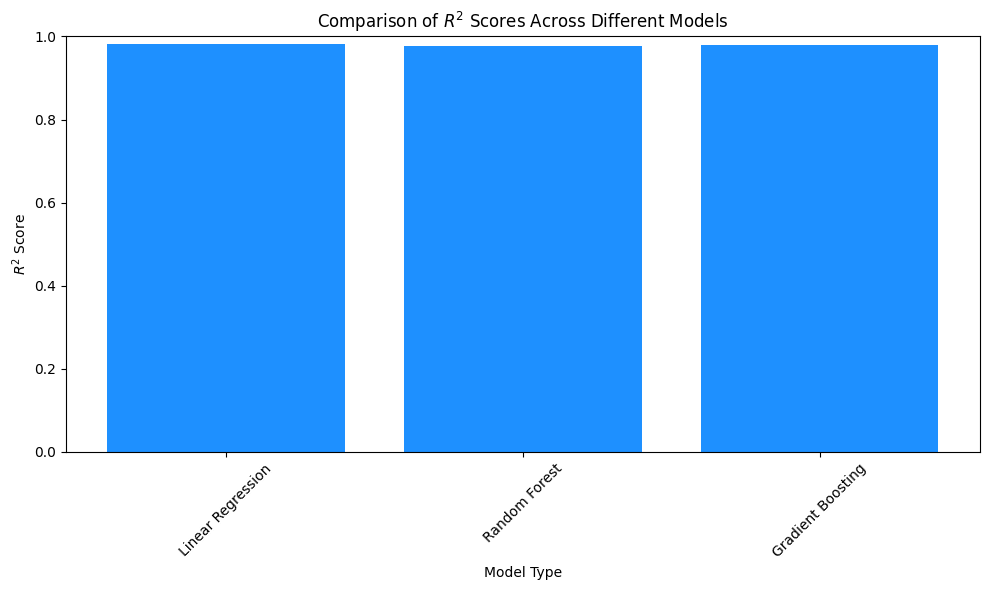

In [ ]:
from sklearn.model_selection import train_test_split


X = df_with.drop('Global_Sales', axis=1)
y = df_with['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42,max_depth=30,max_features='sqrt'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42,max_depth=30,max_features='sqrt'),

}


results = {}
for name, model in models.items():
    r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = r2
import matplotlib.pyplot as plt


model_names = list(results.keys())
r2_scores = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='dodgerblue')
plt.xlabel('Model Type')
plt.ylabel('$R^2$ Score')
plt.title('Comparison of $R^2$ Scores Across Different Models')
plt.ylim([0, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df_na=df.copy()
df_eu=df.copy()
df_jp=df.copy()
df_other=df.copy()

In [ ]:

df_d = df.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales'])
df_c = df.drop(columns=['NA_Sales', 'EU_Sales', 'Other_Sales'])
df_b = df.drop(columns=['NA_Sales', 'NA_Sales', 'JP_Sales'])
df_a = df.drop(columns=['EU_Sales', 'Other_Sales', 'JP_Sales'])


In [ ]:
X_a = df_a.drop('Global_Sales', axis=1)
y_a = df_a['Global_Sales']

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

In [ ]:
X_b = df_b.drop('Global_Sales', axis=1)
y_b = df_b['Global_Sales']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

In [ ]:
X_c = df_c.drop('Global_Sales', axis=1)
y_c = df_c['Global_Sales']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [ ]:
X_d = df_d.drop('Global_Sales', axis=1)
y_d = df_d['Global_Sales']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

In [ ]:
df=df.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

In [ ]:
df=df.drop(columns=['JP_Sales_Percent','NA_Sales_Percent','Other_Sales_Percent','JP_Sales_Percent'])

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('Global_Sales', axis=1)
y = df['Global_Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4783, 17) (4783,)
Testing set shape: (1196, 17) (1196,)


      Scaler                      Model       MSE        r2
22         2      RandomForestRegressor  0.471643  0.686388
17         1      RandomForestRegressor  0.471643  0.686388
12    Robust      RandomForestRegressor  0.503362  0.665297
2   Standard      RandomForestRegressor  0.503805  0.665003
7     MinMax      RandomForestRegressor  0.504305  0.664670
23         2  GradientBoostingRegressor  0.569021  0.621638
18         1  GradientBoostingRegressor  0.569021  0.621638
13    Robust  GradientBoostingRegressor  0.581593  0.613279
8     MinMax  GradientBoostingRegressor  0.582007  0.613004
3   Standard  GradientBoostingRegressor  0.582390  0.612749
4   Standard                        SVR  0.716371  0.523660
9     MinMax                        SVR  0.805795  0.464199
14    Robust                        SVR  0.915214  0.391443
21         2                      Ridge  0.937439  0.376664
16         1                      Ridge  0.937439  0.376664
20         2           LinearRegression 

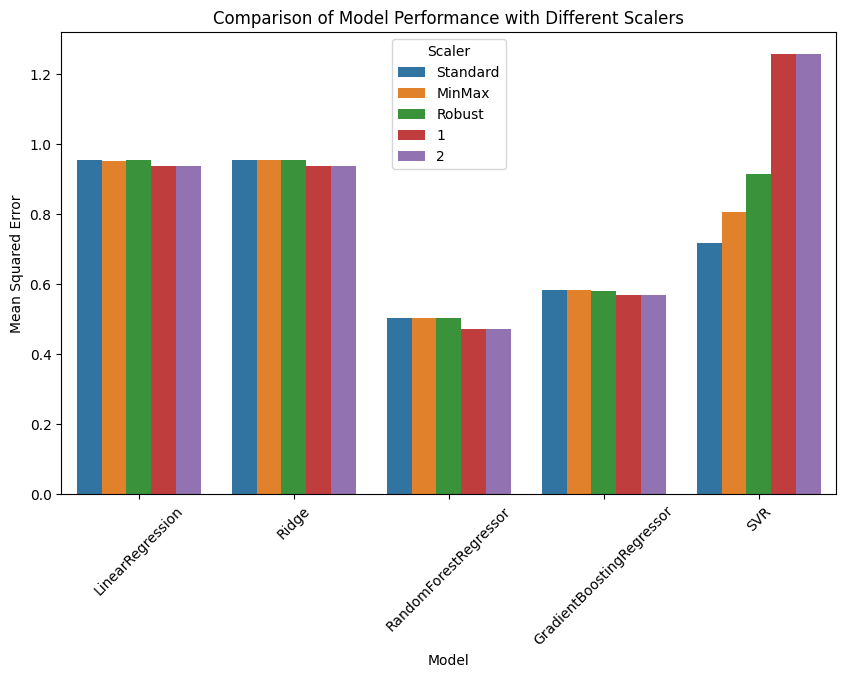

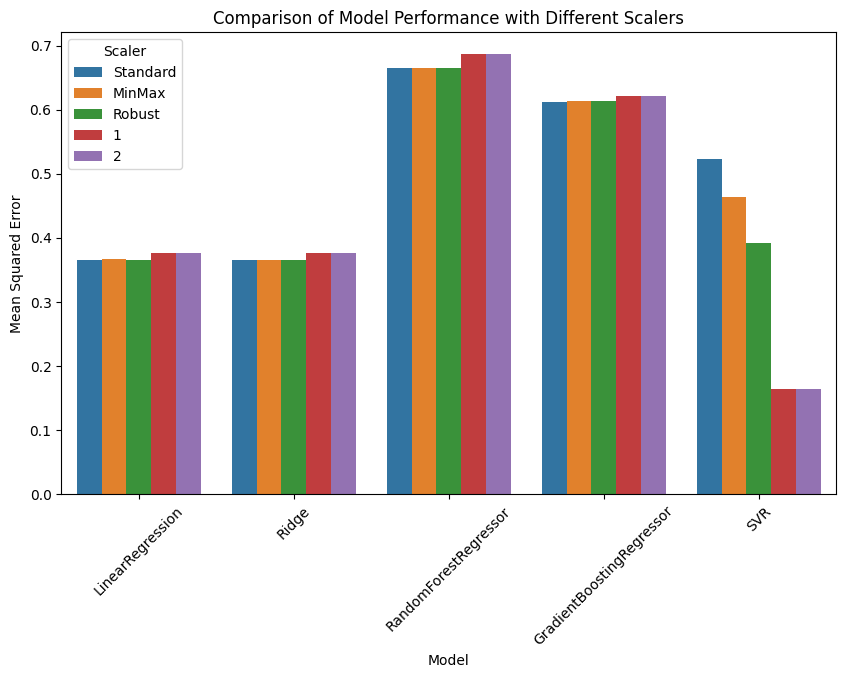

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}
from sklearn.metrics import mean_squared_error,r2_score


scaled_data = {
    'Standard': (X_train_standard, X_test_standard),
    'MinMax': (X_train_minmax, X_test_minmax),
    'Robust': (X_train_robust, X_test_robust),
    '1': (X_train_no, X_test_no),
    '2':(X_train_dum_no, X_test_dum_no)
}


results = []


for scale_name, (X_train_scaled, X_test_scaled) in scaled_data.items():
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2=r2_score(y_test, y_pred)


        results.append({
            'Scaler': scale_name,
            'Model': model_name,
            'MSE': mse,
            'r2':r2
        })


results_df = pd.DataFrame(results)
print(results_df.sort_values(by='MSE'))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MSE', hue='Scaler')
plt.title('Comparison of Model Performance with Different Scalers')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Scaler')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='r2', hue='Scaler')
plt.title('Comparison of Model Performance with Different Scalers')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Scaler')
plt.show()



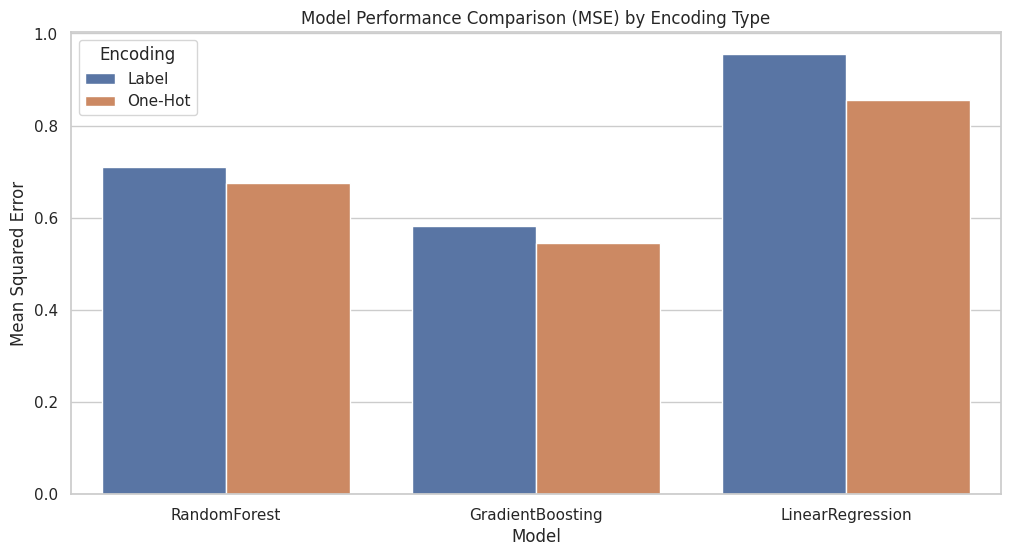

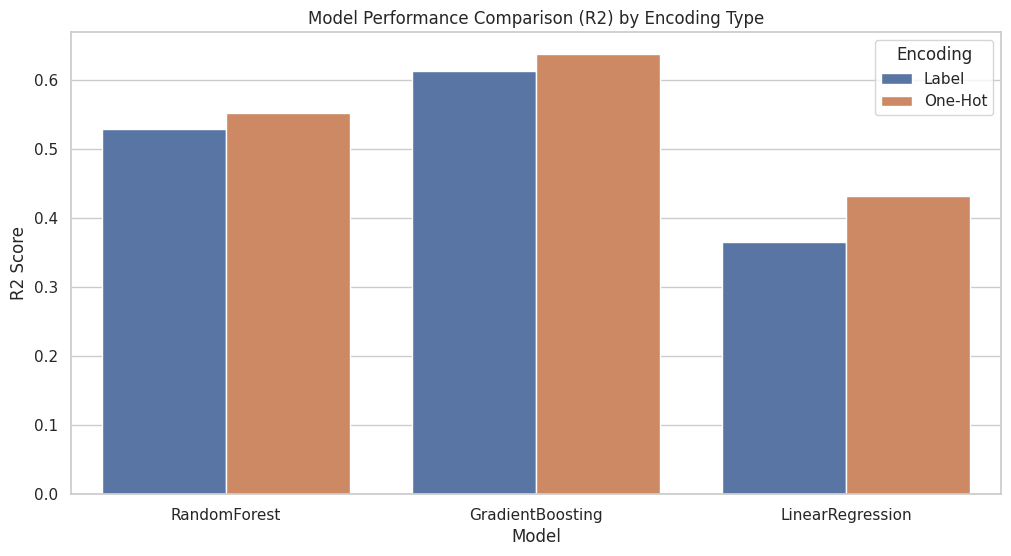

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42),
    'LinearRegression': LinearRegression()
}


X_df = df.drop('Global_Sales', axis=1)
y_df = df['Global_Sales']
X_df_dum = df_dum.drop('Global_Sales', axis=1)
y_df_dum = df_dum['Global_Sales']

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
X_train_df_dum, X_test_df_dum, y_train_df_dum, y_test_df_dum = train_test_split(X_df_dum, y_df_dum, test_size=0.2, random_state=42)


def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

results = []


for name, model in models.items():
    mse_df, r2_df = train_evaluate(model, X_train_df, y_train_df, X_test_df, y_test_df)
    mse_df_dum, r2_df_dum = train_evaluate(model, X_train_df_dum, y_train_df_dum, X_test_df_dum, y_test_df_dum)
    results.append({'Model': name, 'Encoding': 'Label', 'MSE': mse_df, 'R2': r2_df})
    results.append({'Model': name, 'Encoding': 'One-Hot', 'MSE': mse_df_dum, 'R2': r2_df_dum})

results_df = pd.DataFrame(results)


plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='MSE', hue='Encoding')
plt.title('Model Performance Comparison (MSE) by Encoding Type')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.legend(title='Encoding')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='R2', hue='Encoding')
plt.title('Model Performance Comparison (R2) by Encoding Type')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.legend(title='Encoding')
plt.show()



In [ ]:
rf = RandomForestRegressor(n_estimators=300,max_depth=30,
                          #  max_features='sqrt',
                           random_state=42)
rf.fit(X_train_no, y_train_no)

y_pred_no = rf.predict(X_test_no)


y_pred_no = (y_pred_no)

y_pred_original = (y_pred_no)


mse = mean_squared_error(((y_test_no)), y_pred_original)
r2 = r2_score(((y_test_no)), y_pred_original)




print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.46322541126628053
R^2 Score: 0.6919854588526584


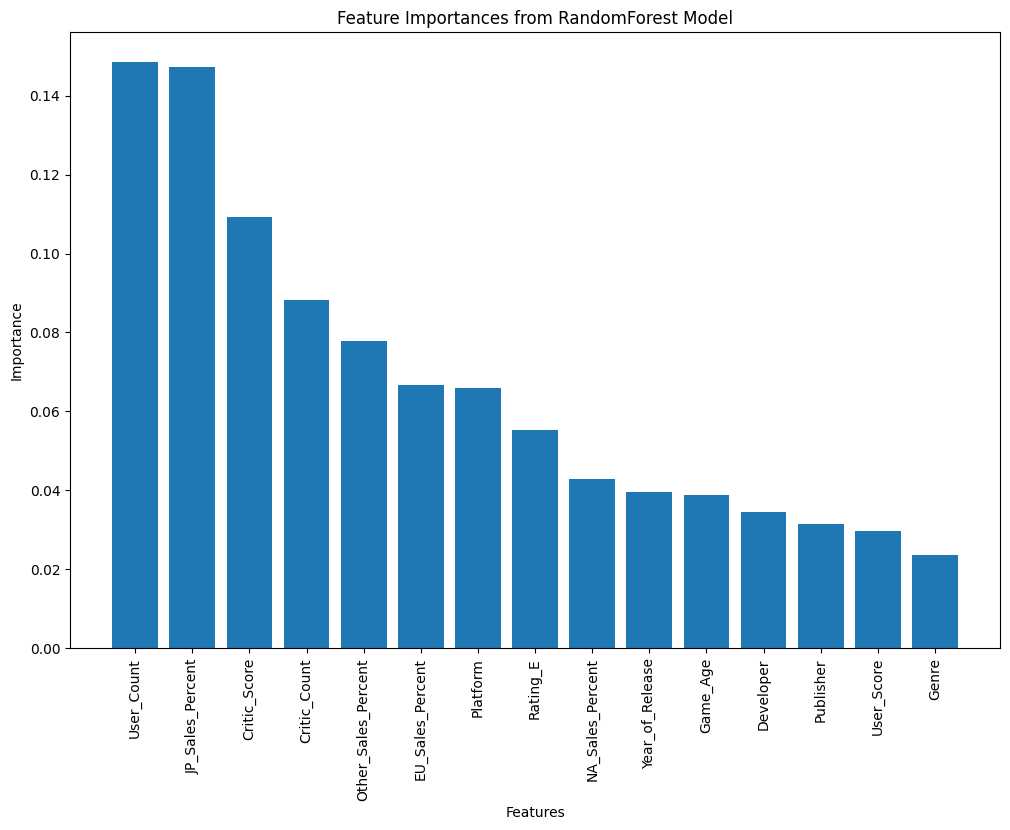

In [ ]:
importances = rf.feature_importances_
feature_names = X_train_no.columns
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importances from RandomForest Model")
plt.bar(range(X_train_no.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_no.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


Random Forest - Mean Squared Error: 0.46924953668656727
Random Forest - R² Score: 0.6879798102375028


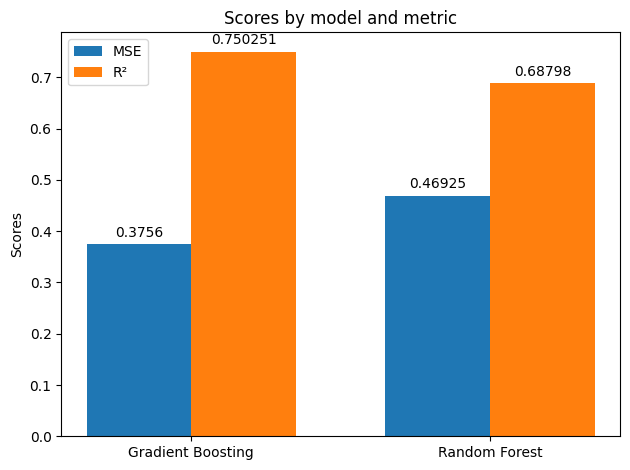

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=500, random_state=42)


rf_model.fit(X_train_dum_no, y_train_dum_no)


y_pred_rf = rf_model.predict(X_test_dum_no)


mse_rf = mean_squared_error(y_test_dum_no, y_pred_rf)
r2_rf = r2_score(y_test_dum_no, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")

import matplotlib.pyplot as plt
import numpy as np


models = ['Gradient Boosting', 'Random Forest']
mse_scores = [mse, mse_rf]
r2_scores = [r2, r2_rf]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_scores, width, label='MSE')
rects2 = ax.bar(x + width/2, r2_scores, width, label='R²')


ax.set_ylabel('Scores')
ax.set_title('Scores by model and metric')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()



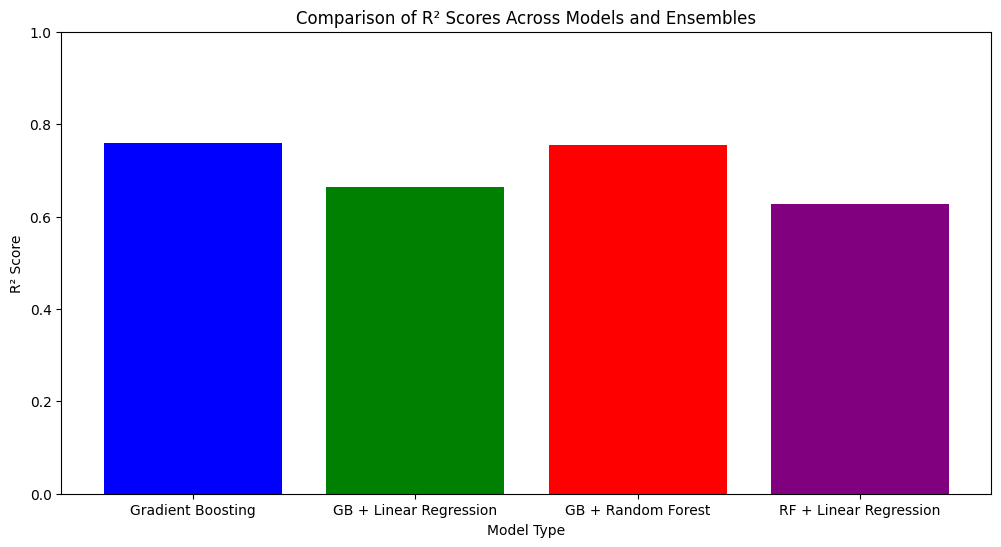

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone

class EnsembleModel:
    def __init__(self, model1, model2, weights=[0.5, 0.5]):
        self.model1 = clone(model1)
        self.model2 = clone(model2)
        self.weights = weights

    def fit(self, X, y):
        self.model1.fit(X, y)
        self.model2.fit(X, y)

    def predict(self, X):
        pred1 = self.model1.predict(X)
        pred2 = self.model2.predict(X)
        return self.weights[0] * pred1 + self.weights[1] * pred2
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=7, max_features='sqrt', random_state=42)
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


gb_lr_ensemble = EnsembleModel(gb_model, lr_model)
gb_rf_ensemble = EnsembleModel(gb_model, rf_model)
rf_lr_ensemble = EnsembleModel(rf_model, lr_model)
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=7, max_features='sqrt', random_state=42)
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


gb_lr_ensemble = EnsembleModel(gb_model, lr_model)
gb_rf_ensemble = EnsembleModel(gb_model, rf_model)
rf_lr_ensemble = EnsembleModel(rf_model, lr_model)
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

models = {
    "Gradient Boosting": gb_model,
    "GB + Linear Regression": gb_lr_ensemble,
    "GB + Random Forest": gb_rf_ensemble,
    "RF + Linear Regression": rf_lr_ensemble
}
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train_no, y_train_no, X_test_no, y_test_no)
    results[name] = (mse, r2)
labels = results.keys()
r2_scores = [results[name][1] for name in labels]

plt.figure(figsize=(12, 6))
plt.bar(labels, r2_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model Type')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores Across Models and Ensembles')
plt.ylim([0, 1])
plt.show()


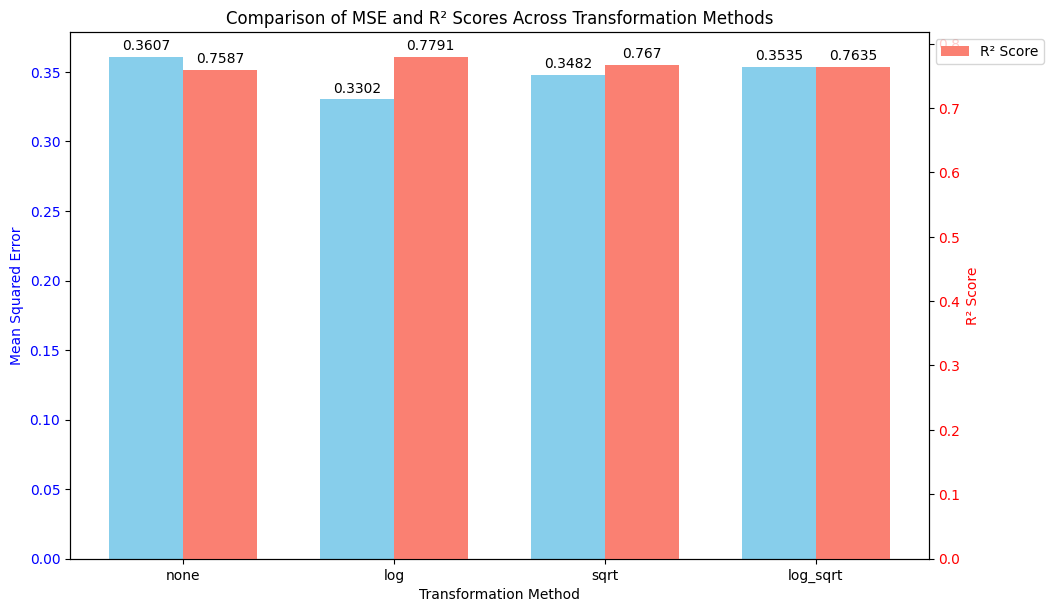

In [ ]:
import numpy as np


def transform_y(y, method='none'):
    if method == 'log':
        return np.log1p(y)
    elif method == 'sqrt':
        return np.sqrt(y)
    elif method == 'log_sqrt':
        return np.log1p(np.sqrt(y))
    return y

def inverse_transform_y(y_pred, method='none'):
    if method == 'log':
        return np.expm1(y_pred)
    elif method == 'sqrt':
        return y_pred**2
    elif method == 'log_sqrt':
        return np.square(np.expm1(y_pred))
    return y_pred
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

def train_and_evaluate(X_train, y_train, X_test, y_test, method):

    y_train_transformed = transform_y(y_train, method)
    y_test_transformed = transform_y(y_test, method)


    gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
                                         max_depth=7, max_features='sqrt', random_state=42)


    gb_model.fit(X_train, y_train_transformed)


    y_pred_transformed = gb_model.predict(X_test)


    y_pred_original = inverse_transform_y(y_pred_transformed, method)


    mse = mean_squared_error(y_test, y_pred_original)
    r2 = r2_score(y_test, y_pred_original)

    return mse, r2
methods = ['none', 'log', 'sqrt', 'log_sqrt']
results = {}

for method in methods:
    mse, r2 = train_and_evaluate(X_train_no, y_train_no, X_test_no, y_test_no, method)
    results[method] = (mse, r2)
import matplotlib.pyplot as plt


labels = results.keys()
mses = [results[method][0] for method in labels]
r2_scores = [results[method][1] for method in labels]


fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(len(labels))
width = 0.35

rects1 = ax1.bar(x - width/2, mses, width, label='MSE', color='skyblue')
ax1.set_xlabel('Transformation Method')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)


ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, r2_scores, width, label='R² Score', color='salmon')
ax2.set_ylabel('R² Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')


def autolabel(rects, ax):

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1, ax1)
autolabel(rects2, ax2)

fig.tight_layout()
plt.title('Comparison of MSE and R² Scores Across Transformation Methods')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


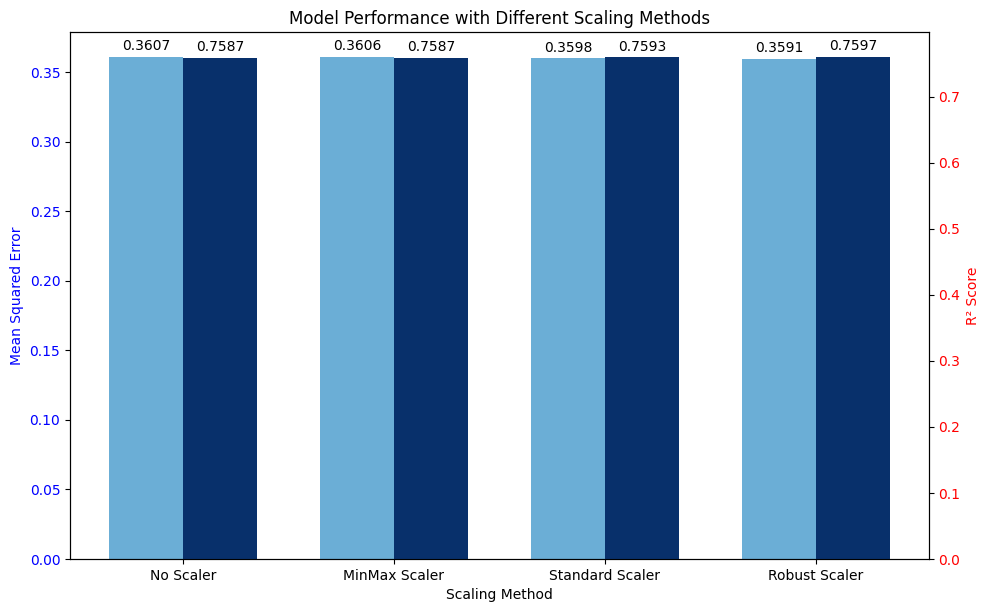

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


scalers = {
    'No Scaler': None,
    'MinMax Scaler': MinMaxScaler(),
    'Standard Scaler': StandardScaler(),
    'Robust Scaler': RobustScaler()
}

results = {}
def train_and_evaluate(scaler, X_train, y_train, X_test, y_test):
    if scaler is not None:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
                                         max_depth=7, max_features='sqrt', random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

for name, scaler in scalers.items():
    mse, r2 = train_and_evaluate(scaler, X_train_no.copy(), y_train_no.copy(), X_test_no.copy(), y_test_no.copy())
    results[name] = (mse, r2)


custom_colors = ['#6baed6', '#08306b']

labels = results.keys()
mses = [result[0] for result in results.values()]
r2_scores = [result[1] for result in results.values()]

x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))


rects1 = ax1.bar(x - width/2, mses, width, label='MSE', color=custom_colors[0])
ax1.set_xlabel('Scaling Method')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)


ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, r2_scores, width, label='R² Score', color=custom_colors[1])
ax2.set_ylabel('R² Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')


def autolabel(rects, ax):
    """Attach a text label above each bar displaying its height"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

fig.tight_layout()
plt.title('Model Performance with Different Scaling Methods')
plt.show()

Mean Squared Error: 0.3755998026940283
R² Score: 0.75025074603403


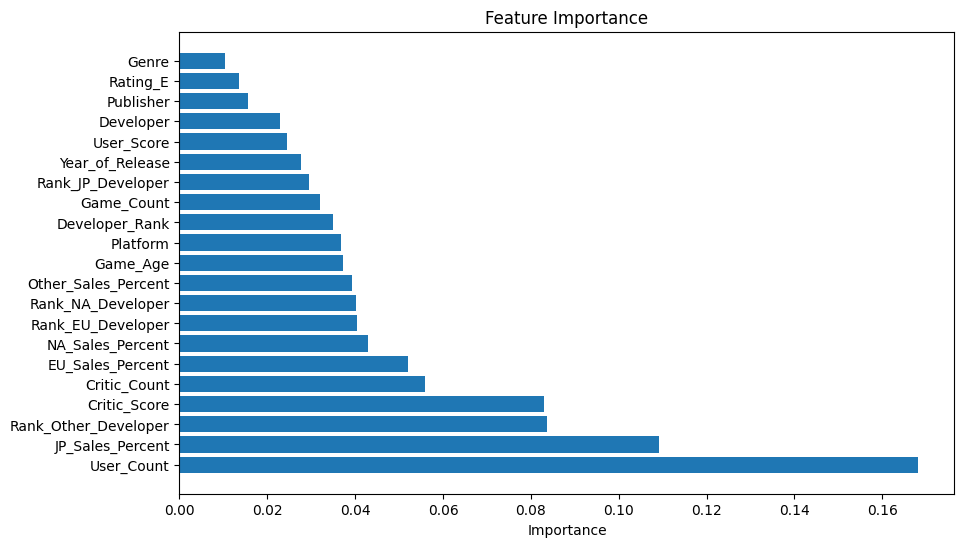

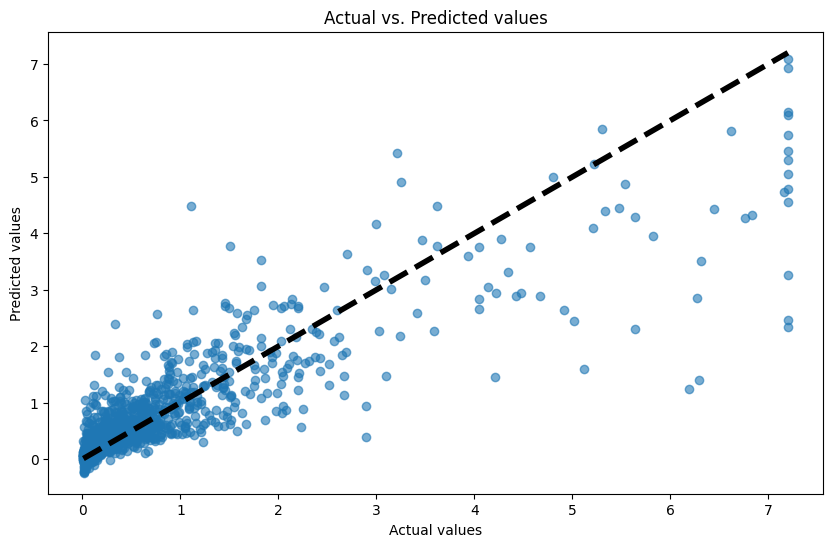

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


gb_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=7,
    max_features='sqrt',
    random_state=42
)


gb_model.fit(X_train_dum_no, y_train_dum_no)


y_pred = gb_model.predict(X_test_dum_no)


mse = mean_squared_error(y_test_dum_no, y_pred)
r2 = r2_score(y_test_dum_no, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


feature_importances = gb_model.feature_importances_
features = X_train_dum_no.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test_dum_no, y_pred, alpha=0.6)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')
plt.plot([y_test_dum_no.min(), y_test_dum_no.max()], [y_test_dum_no.min(), y_test_dum_no.max()], 'k--', lw=4)
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(n_estimators=500 ,learning_rate=0.1,
                                     max_depth=7,
                                     max_features='sqrt',
                                     random_state=42)


gb_model.fit(X_train_a, y_train_a)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = gb_model.predict(X_test_a)

y_pred_original = (y_pred)

mse = mean_squared_error(((y_test_a)), y_pred_original)
r2 = r2_score(((y_test_a)), y_pred_original)



mse = mean_squared_error(((y_test_a)), y_pred_original)
r2 = r2_score(((y_test_a)), y_pred_original)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.19980869422837802
R² Score: 0.9150996940547842


In [ ]:
df_na_no=df_na.drop(columns=['Other_Sales','JP_Sales','EU_Sales','Global_Sales'], axis=1)


In [ ]:
df_na_no['NA_Sales'].replace(0.0, 0.01, inplace=True)


In [ ]:
df_eu=df_eu.drop(columns=['Global_Sales'], axis=1)

In [ ]:
df_eu_no=df_eu.drop(columns=['Other_Sales','JP_Sales','NA_Sales',], axis=1)
X_eu = df_eu.drop(columns=['EU_Sales'], axis=1)
y_eu = df_eu['EU_Sales']


X_train_eu, X_test_eu, y_train_eu, y_test_eu = train_test_split(X_eu, y_eu, test_size=0.2, random_state=42)

In [ ]:
df_jp_no=df_jp.drop(columns=['Other_Sales','NA_Sales','EU_Sales','Global_Sales'], axis=1)


In [ ]:
df_jp=df_jp.drop(columns=['Global_Sales'], axis=1)

In [ ]:
df_other_no=df_other.drop(columns=['NA_Sales','JP_Sales','EU_Sales','Global_Sales'], axis=1)


In [ ]:
df_other=df_other.drop(columns=['Global_Sales'], axis=1)

In [ ]:
df_eu_no.replace(0.0, 0.01, inplace=True)

In [ ]:
df_jp_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5979 entries, 1 to 7216
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Platform              5979 non-null   float64
 1   Genre                 5979 non-null   float64
 2   Publisher             5979 non-null   float64
 3   JP_Sales              5979 non-null   float64
 4   Critic_Score          5979 non-null   float64
 5   Critic_Count          5979 non-null   float64
 6   User_Score            5979 non-null   float64
 7   User_Count            5979 non-null   float64
 8   Developer             5979 non-null   float64
 9   NA_Sales_Percent      5979 non-null   int64  
 10  EU_Sales_Percent      5979 non-null   int64  
 11  JP_Sales_Percent      5979 non-null   int64  
 12  Other_Sales_Percent   5979 non-null   int64  
 13  Game_Count            5979 non-null   int64  
 14  Developer_Rank        5979 non-null   int64  
 15  Rank_NA_Developer     5979

In [ ]:
df_jp_no.replace(0.0, 0.01, inplace=True)

In [ ]:
df_na=df_na.drop(columns=['NA_Sales_Percent'])

In [ ]:
df_na=df_na.drop(columns=['Global_Sales'], axis=1)

In [ ]:
X_eu = df_eu.drop(columns=['EU_Sales'], axis=1)
y_eu = df_eu['EU_Sales']

X_train_eu, X_test_eu, y_train_eu, y_test_eu = train_test_split(X_eu, y_eu, test_size=0.2, random_state=42)

In [ ]:
# df_na=df_na.drop(columns=['EU_Sales_Percent','JP_Sales_Percent','Other_Sales_Percent'], axis=1)

In [ ]:
df_other=df_other.drop(columns=['NA_Sales_Percent','EU_Sales_Percent','JP_Sales_Percent','Other_Sales_Percent'], axis=1)
df_na=df_na.drop(columns=['EU_Sales_Percent','JP_Sales_Percent','Other_Sales_Percent'], axis=1)
df_eu=df_eu.drop(columns=['NA_Sales_Percent','EU_Sales_Percent','JP_Sales_Percent','Other_Sales_Percent'], axis=1)
df_jp=df_jp.drop(columns=['NA_Sales_Percent','EU_Sales_Percent','JP_Sales_Percent','Other_Sales_Percent'], axis=1)

In [ ]:
df_other_no=df_other_no.drop(columns=['NA_Sales_Percent','EU_Sales_Percent','JP_Sales_Percent'], axis=1)
df_na_no=df_na_no.drop(columns=['EU_Sales_Percent','JP_Sales_Percent','Other_Sales_Percent'], axis=1)
df_eu_no=df_eu_no.drop(columns=['NA_Sales_Percent','JP_Sales_Percent','Other_Sales_Percent'], axis=1)
df_jp_no=df_jp_no.drop(columns=['NA_Sales_Percent','EU_Sales_Percent','Other_Sales_Percent'], axis=1)

In [ ]:
df_jp_no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5979 entries, 1 to 7216
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Platform             5979 non-null   float64
 1   Genre                5979 non-null   float64
 2   Publisher            5979 non-null   float64
 3   JP_Sales             5979 non-null   float64
 4   Critic_Score         5979 non-null   float64
 5   Critic_Count         5979 non-null   float64
 6   User_Score           5979 non-null   float64
 7   User_Count           5979 non-null   float64
 8   Developer            5979 non-null   float64
 9   NA_Sales_Percent     5979 non-null   float64
 10  EU_Sales_Percent     5979 non-null   float64
 11  JP_Sales_Percent     5979 non-null   float64
 12  Other_Sales_Percent  5979 non-null   float64
 13  Game_Count           5979 non-null   int64  
 14  Developer_Rank       5979 non-null   int64  
 15  Rank_JP_Developer    5979 non-null   int64 

In [ ]:
df_other=df_other.drop(columns=['Rank_NA_Developer','Rank_JP_Developer','Rank_EU_Developer'], axis=1)
df_na=df_na.drop(columns=['Rank_EU_Developer','Rank_JP_Developer','Rank_Other_Developer'], axis=1)
df_eu=df_eu.drop(columns=['Rank_NA_Developer','Rank_JP_Developer','Rank_Other_Developer'], axis=1)
df_jp=df_jp.drop(columns=['Rank_NA_Developer','Rank_EU_Developer','Rank_Other_Developer'], axis=1)

In [ ]:
df_other_no=df_other_no.drop(columns=['Rank_NA_Developer','Rank_JP_Developer','Rank_EU_Developer'], axis=1)
df_na_no=df_na_no.drop(columns=['Rank_EU_Developer','Rank_JP_Developer','Rank_Other_Developer'], axis=1)
df_eu_no=df_eu_no.drop(columns=['Rank_NA_Developer','Rank_JP_Developer','Rank_Other_Developer'], axis=1)
df_jp_no=df_jp_no.drop(columns=['Rank_NA_Developer','Rank_EU_Developer','Rank_Other_Developer'], axis=1)

In [ ]:
# df_jp=df_jp.drop(columns=['NA_Sales_Percent'])
# df_jp=df_jp.drop(columns=['JP_Sales_Percent'])
# df_jp=df_jp.drop(columns=['Other_Sales_Percent'])
# df_jp=df_jp.drop(columns=['EU_Sales_Percent'])

In [ ]:
from sklearn.model_selection import train_test_split


X_na = df_na.drop(columns=['NA_Sales'], axis=1)
y_na = df_na['NA_Sales']

X_train_na, X_test_na, y_train_na, y_test_na = train_test_split(X_na, y_na, test_size=0.2, random_state=42)



In [ ]:
X_eu_no = df_eu_no.drop(columns=['EU_Sales'], axis=1)
y_eu_no = df_eu_no['EU_Sales']
X_train_eu_no, X_test_eu_no, y_train_eu_no, y_test_eu_no = train_test_split(X_eu_no, y_eu_no, test_size=0.2, random_state=42)

In [ ]:
X_other_no = df_other_no.drop(columns=['Other_Sales'], axis=1)
y_other_no = df_other_no['Other_Sales']


X_train_other_no, X_test_other_no, y_train_other_no, y_test_other_no = train_test_split(X_other_no, y_other_no, test_size=0.2, random_state=42)

In [ ]:
X_eu = df_eu.drop(columns=['EU_Sales'], axis=1)
y_eu = df_eu['EU_Sales']
X_train_eu, X_test_eu, y_train_eu, y_test_eu = train_test_split(X_eu, y_eu, test_size=0.2, random_state=42)

In [ ]:
X_jp = df_jp.drop(columns=['JP_Sales'], axis=1)
y_jp = df_jp['JP_Sales']
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_jp, y_jp, test_size=0.2, random_state=42)

In [ ]:
X_na_no = df_na_no.drop(columns=['NA_Sales'], axis=1)
y_na_no = df_na_no['NA_Sales']
X_train_na_no, X_test_na_no, y_train_na_no, y_test_na_no = train_test_split(X_na_no, y_na_no, test_size=0.2, random_state=42)

In [ ]:
X_other = df_other.drop(columns=['Other_Sales'], axis=1)
y_other = df_other['Other_Sales']
X_train_other, X_test_other, y_train_other, y_test_other = train_test_split(X_other, y_other, test_size=0.2, random_state=42)

In [ ]:
X_jp_no = df_jp_no.drop(columns=['JP_Sales'], axis=1)
y_jp_no = df_jp_no['JP_Sales']
X_train_jp_no, X_test_jp_no, y_train_jp_no, y_test_jp_no = train_test_split(X_jp_no, y_jp_no, test_size=0.2, random_state=42)

In [ ]:
X_train_jp_no

,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,NA_Sales_Percent,EU_Sales_Percent,Other_Sales_Percent,Game_Count,Developer_Rank,Rank_JP_Developer,Game_Age,Rating_E
1504,12.00,2004,0.01,16.0,72.0,17.0,65,6.0,730.0,67.0,22.0,0.01,12,5,3,12.0,False
5827,12.00,2005,0.01,186.0,75.0,55.0,81,16.0,860.0,73.0,18.0,0.01,4,2,1,11.0,False
6743,0.01,2007,8.00,171.0,72.0,48.0,79,37.0,639.0,88.0,6.0,6.00,3,1,1,9.0,False
3820,3.00,2010,0.01,29.0,78.0,17.0,63,211.0,120.0,71.0,14.0,7.00,15,6,4,6.0,False
4656,5.00,2003,10.00,167.0,58.0,19.0,78,8.0,25.0,50.0,38.0,12.00,24,8,1,13.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,2.00,2004,8.00,54.0,35.0,11.0,20,9.0,114.0,60.0,20.0,0.01,19,7,1,12.0,False
6080,11.00,2009,10.00,189.0,69.0,31.0,79,15.0,759.0,73.0,13.0,7.00,3,1,1,7.0,False
6119,12.00,2004,0.01,52.0,82.0,61.0,73,12.0,401.0,76.0,24.0,6.00,4,2,1,12.0,False
6345,12.00,2004,8.00,16.0,62.0,31.0,81,9.0,366.0,82.0,18.0,0.01,2,1,1,12.0,False


In [ ]:
# df_cap3=df_na_no.copy()
# cap3 = df_cap3['NA_Sales'].quantile(0.99)
# df_cap3.loc[df_cap3['NA_Sales'] > cap3, 'NA_Sales'] = cap3
# df_na_no=df_cap3

In [ ]:
# df_cap3=df_eu_no.copy()
# cap3 = df_cap3['EU_Sales'].quantile(0.98)
# df_cap3.loc[df_cap3['EU_Sales'] > cap3, 'EU_Sales'] = cap3
# df_eu_no=df_cap3

In [ ]:
# df_cap3=df_jp_no.copy()
# cap3 = df_cap3['JP_Sales'].quantile(0.98)
# df_cap3.loc[df_cap3['JP_Sales'] > cap3, 'JP_Sales'] = cap3
# df_jp_no=df_cap3

In [ ]:
# df_cap3=df_other_no.copy()
# cap3 = df_cap3['Other_Sales'].quantile(0.99)
# df_cap3.loc[df_cap3['Other_Sales'] > cap3, 'Other_Sales'] = cap3
# df_other_no=df_cap3

In [ ]:
# df_other_no=df_other_no.drop(columns=['Year_of_Release'])
# df_na_no=df_na_no.drop(columns=['Year_of_Release'])
# df_eu_no=df_eu_no.drop(columns=['Year_of_Release'])
# df_jp_no=df_jp_no.drop(columns=['Year_of_Release'])

NA - MSE scores for each fold: [0.1088319  0.09615312 0.09990901 0.0902662  0.10192071]
NA - Mean MSE: 0.09941618668862266
NA - Standard Deviation of MSE: 0.00615696661829091
EU - MSE scores for each fold: [0.04188745 0.03894412 0.04424246 0.04402125 0.04478118]
EU - Mean MSE: 0.04277529031684754
EU - Standard Deviation of MSE: 0.0021538211867630315
Other - MSE scores for each fold: [0.00325224 0.00312149 0.00383395 0.00321716 0.00485327]
Other - Mean MSE: 0.003655622810817328
Other - Standard Deviation of MSE: 0.0006490662802536174
JP - MSE scores for each fold: [0.00586595 0.00475882 0.00507367 0.0061112  0.00611148]
JP - Mean MSE: 0.00558422455603705
JP - Standard Deviation of MSE: 0.0005616095150767502


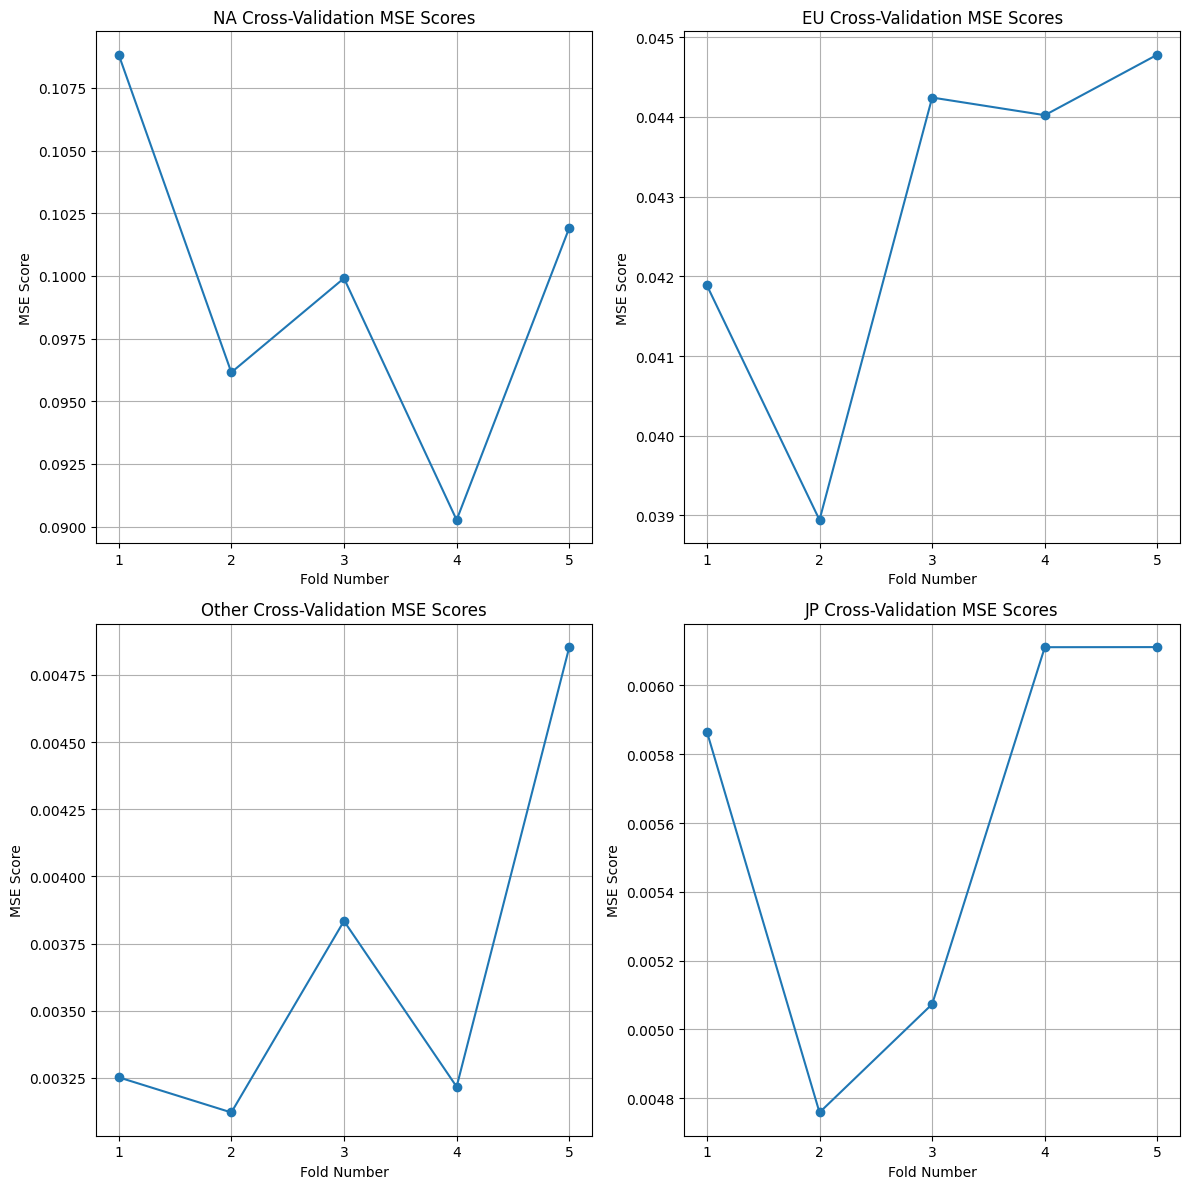

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


datasets = {
    'NA': df_na_no,
    'EU': df_eu_no,
    'Other': df_other_no,
    'JP': df_jp_no
}


model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42, max_features='log2')


kf = KFold(n_splits=5, shuffle=True, random_state=42)


def perform_cv(X, y, model, kf):

    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

    mse_scores = -cv_scores
    return mse_scores


fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
plot_index = 0


for region, df in datasets.items():
    X = df.drop(f'{region}_Sales', axis=1)
    y = df[f'{region}_Sales']

    mse_scores = perform_cv(X, y, model, kf)

    print(f"{region} - MSE scores for each fold: {mse_scores}")
    print(f"{region} - Mean MSE: {np.mean(mse_scores)}")
    print(f"{region} - Standard Deviation of MSE: {np.std(mse_scores)}")


    axs[plot_index].plot(range(1, len(mse_scores) + 1), mse_scores, marker='o')
    axs[plot_index].set_title(f'{region} Cross-Validation MSE Scores')
    axs[plot_index].set_xlabel('Fold Number')
    axs[plot_index].set_ylabel('MSE Score')
    axs[plot_index].set_xticks(range(1, len(mse_scores) + 1))
    axs[plot_index].grid(True)

    plot_index += 1

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


datasets = {
    'NA': df_na_no,
    'EU': df_eu_no,
    'Other': df_other_no,
    'JP': df_jp_no
}


param_grid = {
    'n_estimators': [100, 200, 300,500],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


all_results = pd.DataFrame()


for region, df in datasets.items():
    X = df.drop(f'{region}_Sales', axis=1)
    y = df[f'{region}_Sales']


    model = GradientBoostingRegressor(random_state=42)


    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, return_train_score=True)
    grid_search.fit(X, y)

    print(f"{region} - Best parameters: {grid_search.best_params_}")
    print(f"{region} - Best cross-validation score: {-grid_search.best_score_:.4f}")


    cv_results = pd.DataFrame(grid_search.cv_results_)
    cv_results['Region'] = region
    all_results = pd.concat([all_results, cv_results], ignore_index=True)




Fitting 5 folds for each of 36 candidates, totalling 180 fits
NA - Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
NA - Best cross-validation score: 0.1332
Fitting 5 folds for each of 36 candidates, totalling 180 fits
EU - Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}
EU - Best cross-validation score: 0.0634
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Other - Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}
Other - Best cross-validation score: 0.0065
Fitting 5 folds for each of 36 candidates, totalling 180 fits
JP - Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
JP - Best cross-validation score: 0.0061


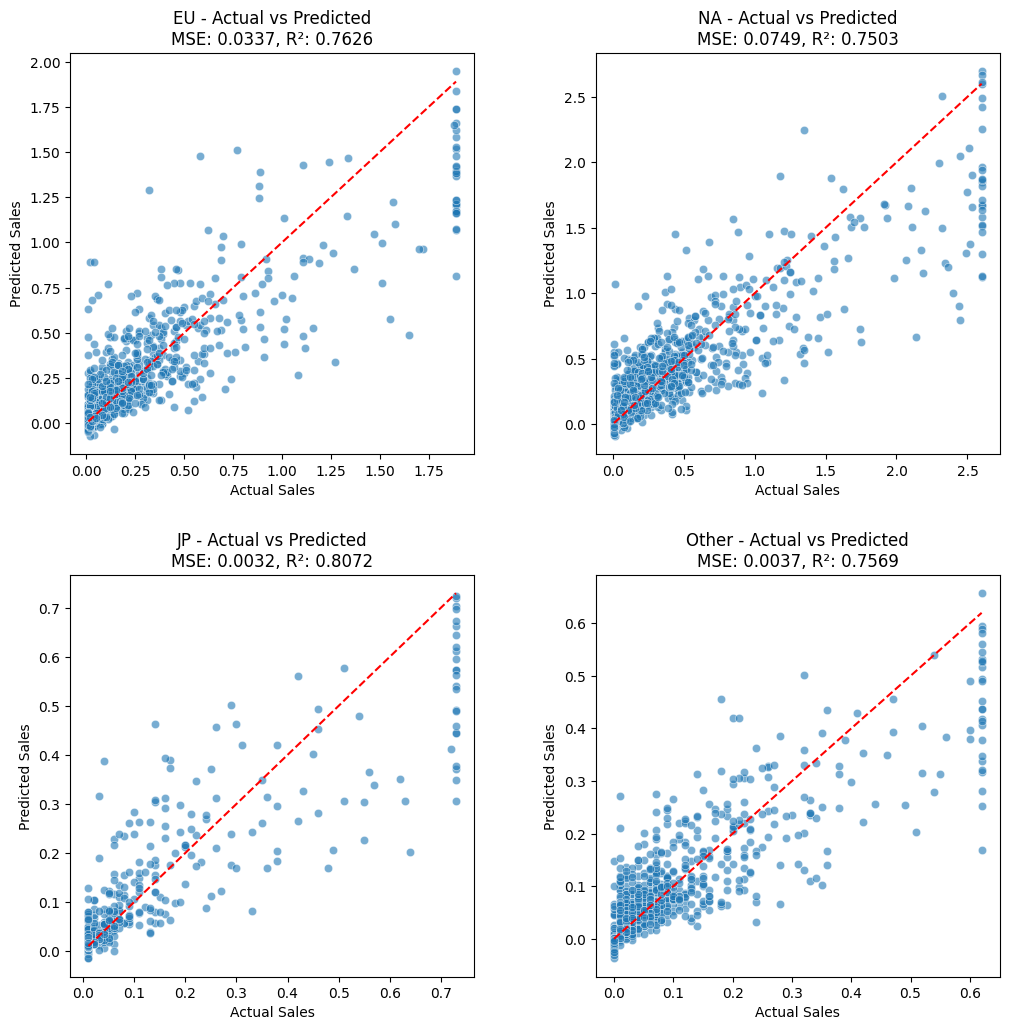

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from joblib import dump


def model_predictions_and_save(df, target, filename):
    X = df.drop(target, axis=1)
    y = df[target]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model_pipeline = Pipeline([
             ('scaler', MinMaxScaler()),
        ('model', GradientBoostingRegressor(
            n_estimators=600,
            learning_rate=0.05,
            max_depth=7,
            max_features='log2',
            random_state=42))
    ])


    model_pipeline.fit(X_train, y_train)


    dump(model_pipeline, filename)


    y_pred = model_pipeline.predict(X_test)

    return y_test, y_pred


region_datasets = {
    'EU': df_eu_no,
    'NA': df_na_no,
    'JP': df_jp_no,
    'Other': df_other_no
}


fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i, (region, data) in enumerate(region_datasets.items()):
    filename = f'model_{region}.joblib'
    actual, predicted = model_predictions_and_save(data, f'{region}_Sales', filename)
    sns.scatterplot(x=actual, y=predicted, ax=axs[i], alpha=0.6)
    axs[i].plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')
    mse = mean_squared_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    axs[i].set_title(f'{region} - Actual vs Predicted\nMSE: {mse:.4f}, R²: {r2:.4f}')
    axs[i].set_xlabel('Actual Sales')
    axs[i].set_ylabel('Predicted Sales')

plt.show()


In [ ]:
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np


scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
      'LinearRegression': LinearRegression(),
    'Lasso':Lasso(alpha=0.1)
}


hyperparameters = {
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'RandomForest': {'model__n_estimators': [100, 200], 'model__max_depth': [10, 20]},
    'GradientBoosting': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1]},
        'LinearRegression':{},
    'Lasso':{}
}


transformations = {
    'log': np.log1p,
    'sqrt': np.sqrt
}


inverse_transformations = {
    'log': np.expm1,
    'sqrt': np.square
}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
def run_experiment(data, target_col):
    results = []
    X = data.drop(columns=[target_col])
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for transform_key, transform_func in transformations.items():
        y_train_transformed = transform_func(y_train)
        y_test_transformed = transform_func(y_test)

        for scaler_key, scaler in scalers.items():
            for model_key, model in models.items():
                pipeline = Pipeline([
                    ('scaler', scaler),
                    ('model', model)
                ])

                if model_key in hyperparameters:
                    clf = GridSearchCV(pipeline, hyperparameters[model_key], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
                    clf.fit(X_train, y_train_transformed)
                    best_model = clf.best_estimator_
                    y_pred_transformed = best_model.predict(X_test)
                    y_pred = inverse_transformations[transform_key](y_pred_transformed)

                    mse = mean_squared_error(y_test, y_pred)
                    r2 = r2_score(y_test, y_pred)
                    results.append({
                        'Region': target_col.split('_')[0],
                        'Scaler': scaler_key,
                        'Model': model_key,
                        'Transformation': transform_key,
                        'MSE': mse,
                        'r2': r2,
                        'Best Params': clf.best_params_
                    })

    return pd.DataFrame(results)


na_results = run_experiment(df_na_no, 'NA_Sales')
eu_results = run_experiment(df_eu_no, 'EU_Sales')
jp_results = run_experiment(df_jp_no, 'JP_Sales')
other_results = run_experiment(df_other_no, 'Other_Sales')


all_results = pd.concat([na_results, eu_results,jp_results,other_results])
print(all_results.sort_values(by='r2'))


   Region          Scaler             Model Transformation       MSE  \
24  Other    MinMaxScaler             Lasso           sqrt  0.022713   
19  Other  StandardScaler             Lasso           sqrt  0.022713   
24     NA    MinMaxScaler             Lasso           sqrt  0.402677   
24     EU    MinMaxScaler             Lasso           sqrt  0.188780   
24     JP    MinMaxScaler             Lasso           sqrt  0.030792   
..    ...             ...               ...            ...       ...   
22  Other    MinMaxScaler  GradientBoosting           sqrt  0.003588   
27  Other    RobustScaler  GradientBoosting           sqrt  0.003557   
2   Other  StandardScaler  GradientBoosting            log  0.003452   
7   Other    MinMaxScaler  GradientBoosting            log  0.003452   
12  Other    RobustScaler  GradientBoosting            log  0.003415   

          r2                                        Best Params  
24 -0.061040                                                 {}  
19 

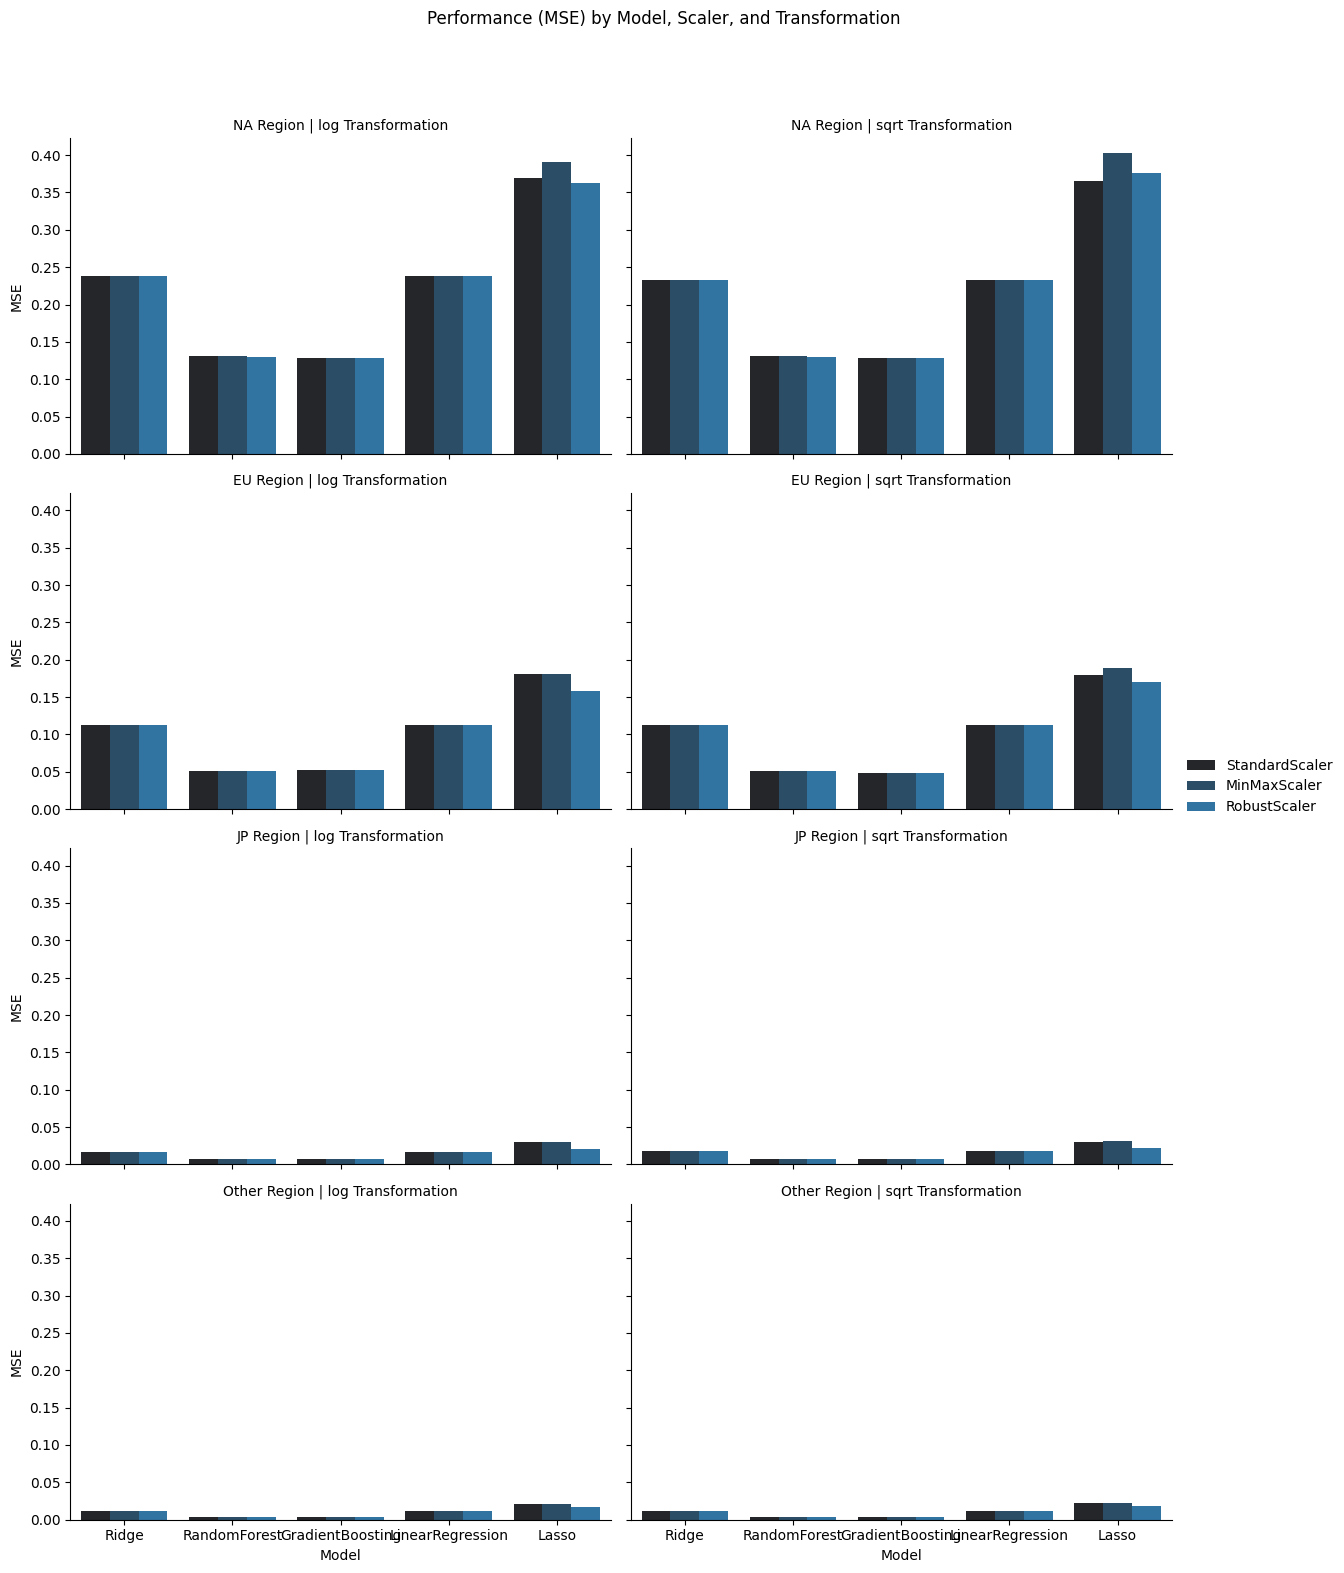

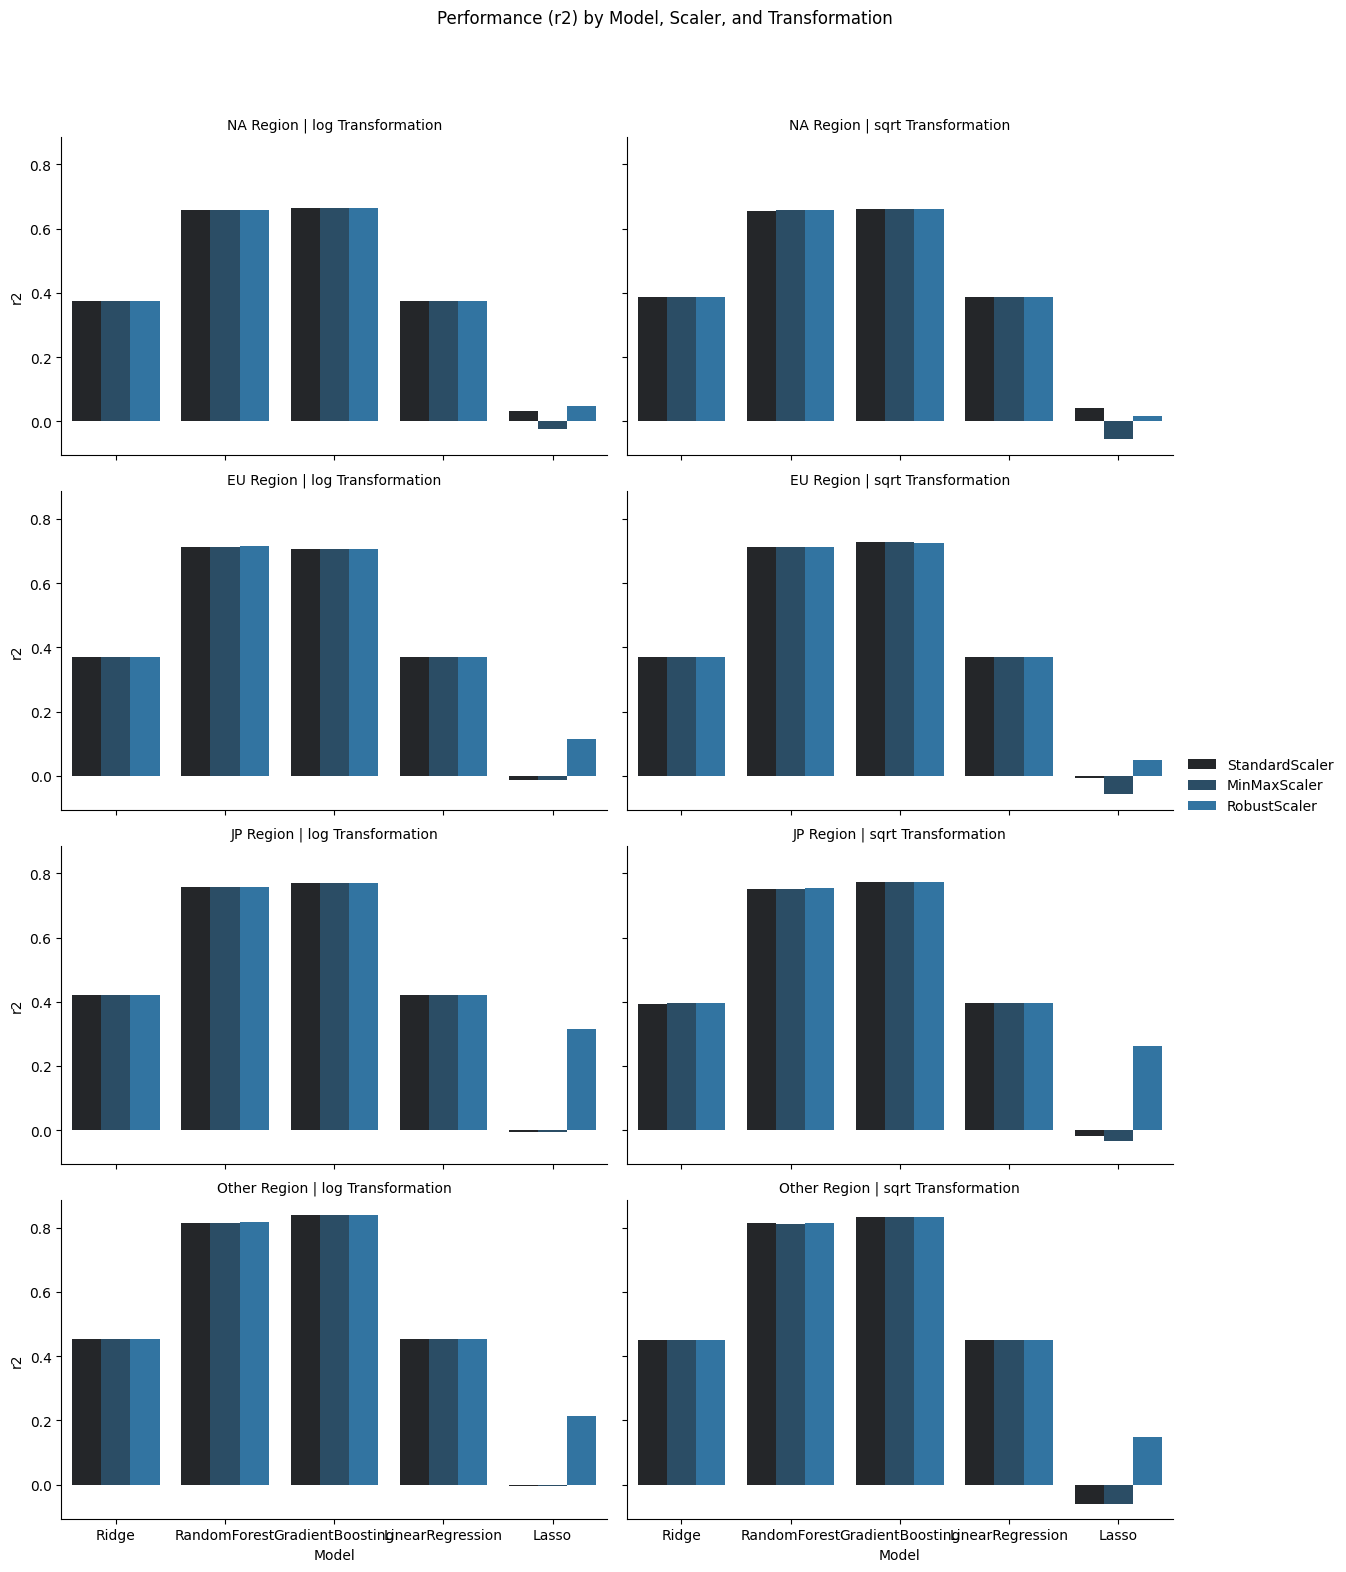

In [ ]:
def plot_detailed_results(results, metric):


    g = sns.FacetGrid(results, col='Transformation', row='Region', height=4, aspect=1.5)
    g.map_dataframe(sns.barplot, x='Model', y=metric, hue='Scaler')
    g.add_legend()
    g.set_axis_labels('Model', metric)
    g.set_titles(col_template="{col_name} Transformation", row_template="{row_name} Region")


    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Performance ({metric}) by Model, Scaler, and Transformation')
    plt.show()


plot_detailed_results(all_results, 'MSE')
plot_detailed_results(all_results, 'r2')


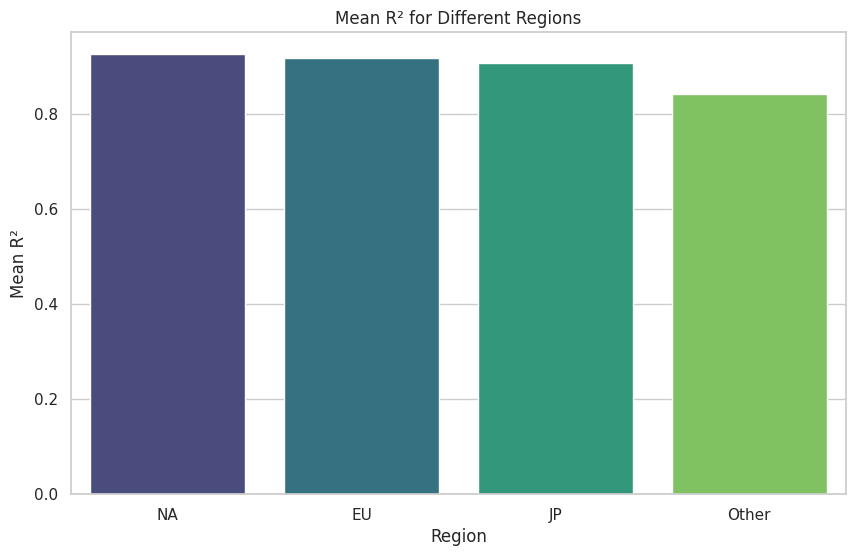

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Mean R²', data=results_df, palette='viridis')
plt.title('Mean R² for Different Regions')
plt.xlabel('Region')
plt.ylabel('Mean R²')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model = GradientBoostingRegressor(n_estimators=500 ,learning_rate=0.1,
                                    #  max_depth=7,
                                     max_features='log2',
                                     random_state=42)


gb_model.fit(X_train_na, y_train_na)


GradientBoostingRegressor(max_features='log2', n_estimators=500,
                          random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred_na = gb_model.predict(X_test_na)

y_pred_original = (y_pred_na)

mse = mean_squared_error(((y_test_na)), y_pred_original)
r2 = r2_score(((y_test_na)), y_pred_original)




print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.11472626167700073
R² Score: 0.8128980692034772


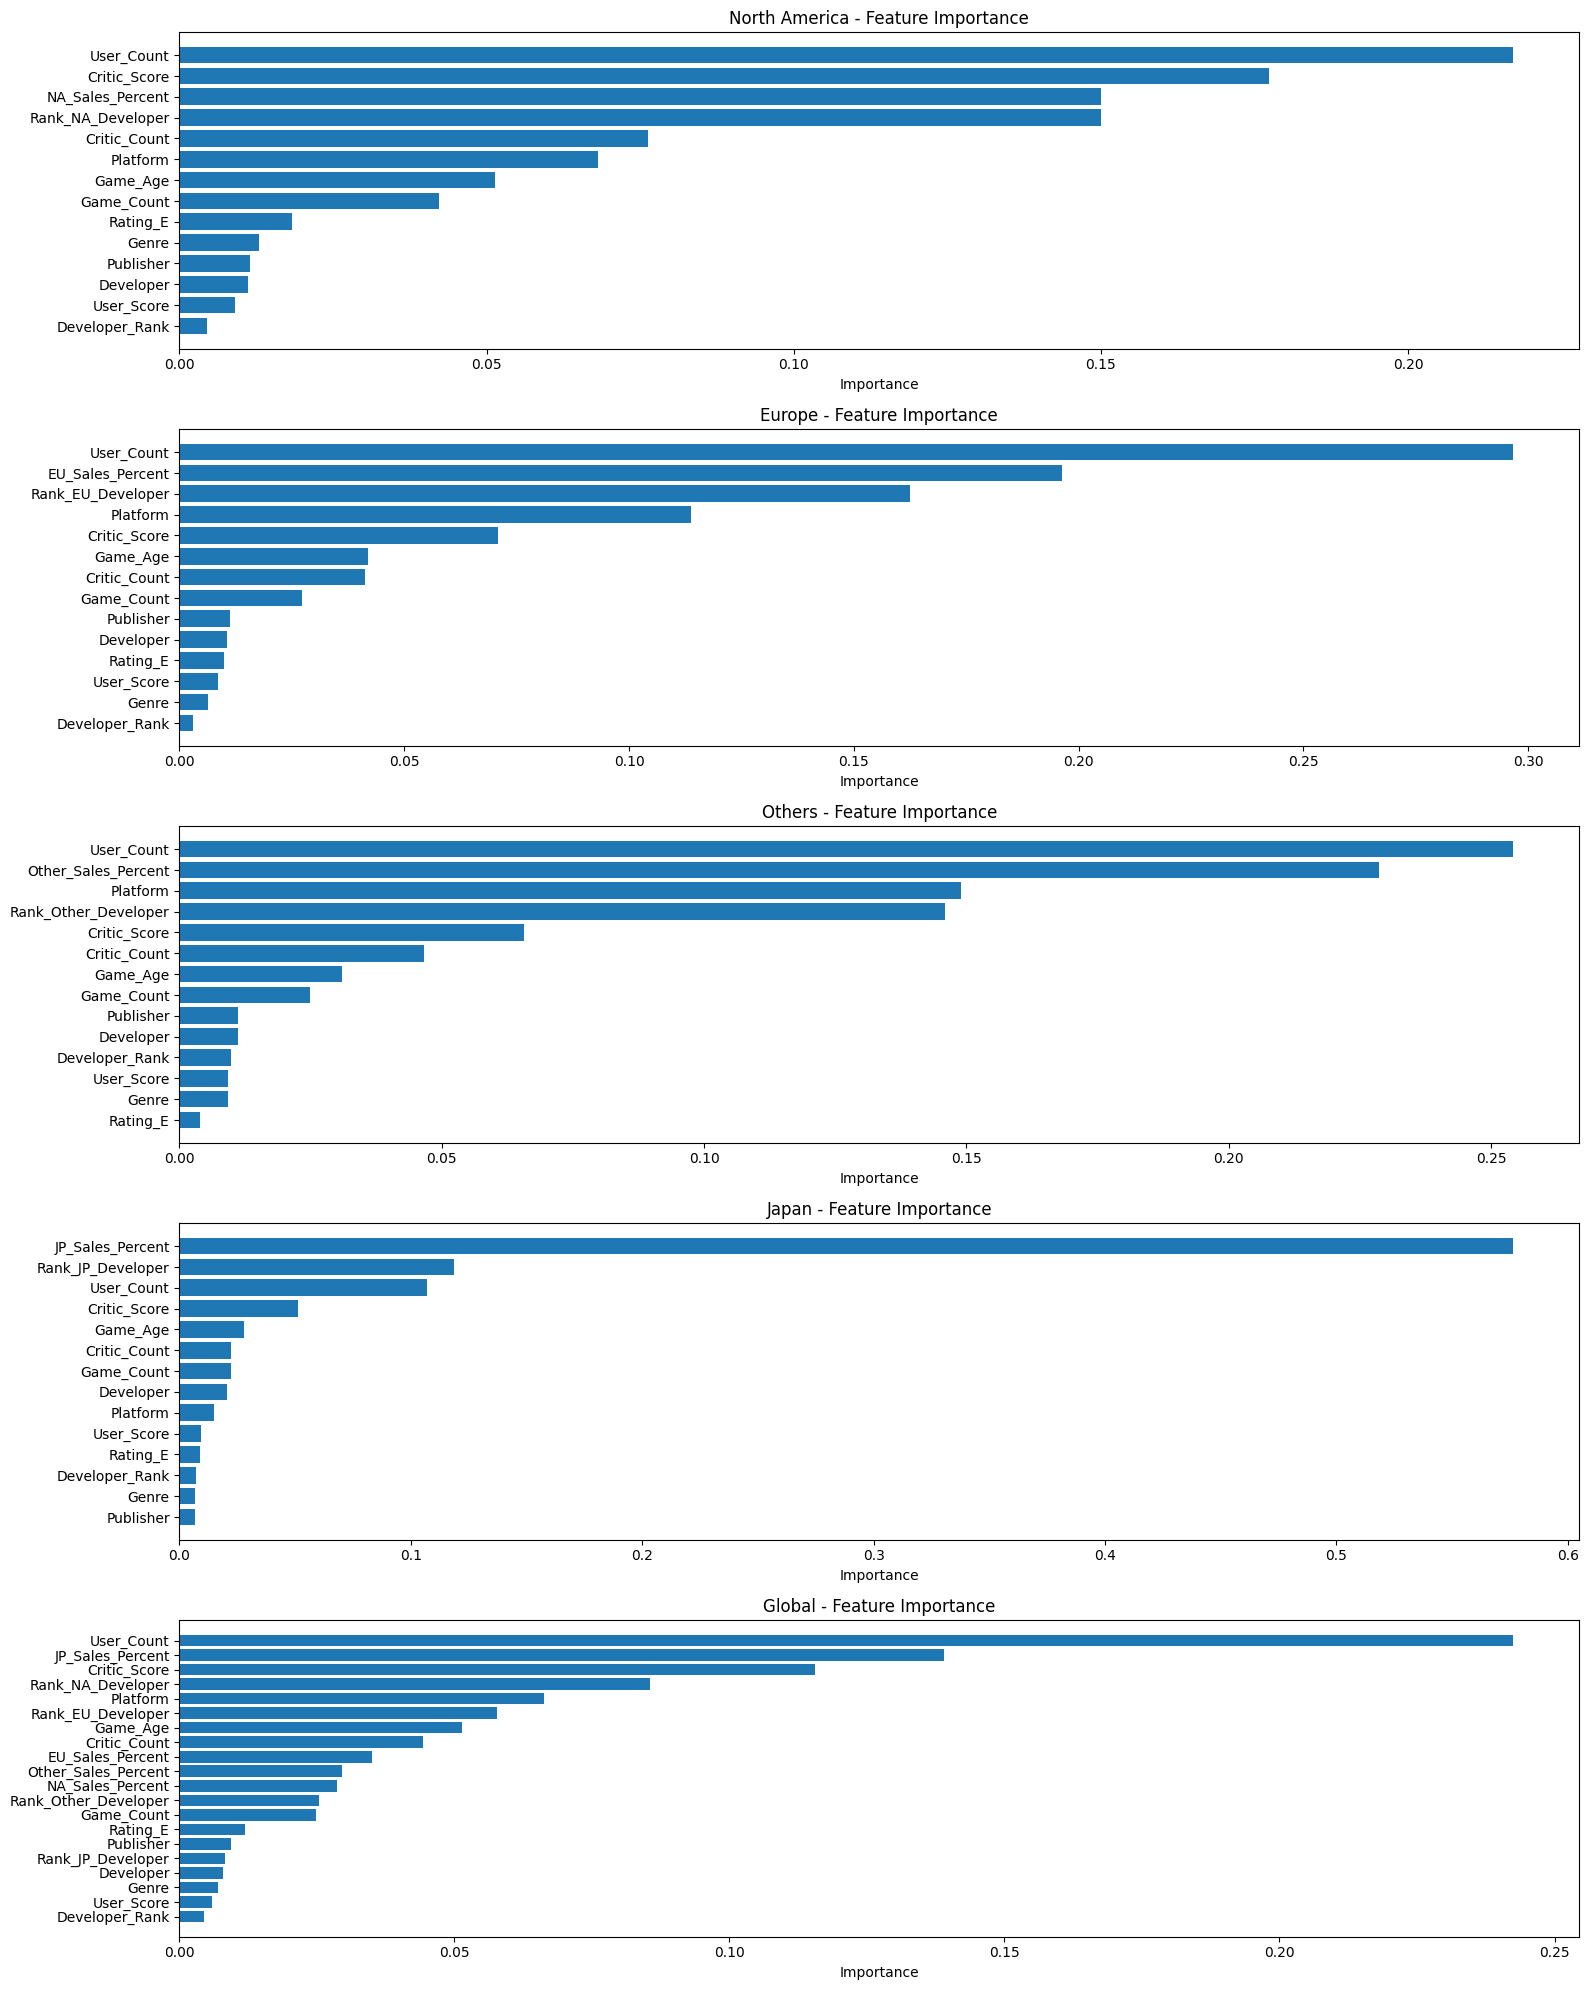

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

regions_data = {
    "North America": (df_na_no, X_train_na_no, y_train_na_no, X_test_na_no, y_test_na_no),
    "Europe": (df_eu_no, X_train_eu_no, y_train_eu_no, X_test_eu_no, y_test_eu_no),
    "Others": (df_other_no, X_train_other_no, y_train_other_no, X_test_other_no, y_test_other_no),
    "Japan": (df_jp_no, X_train_jp_no, y_train_jp_no, X_test_jp_no, y_test_jp_no),
    "Global":(df_no, X_train_no, y_train_no, X_test_no, y_test_no)
}

gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,  random_state=42)


fig, axs = plt.subplots(5, 1, figsize=(16, 20))

for i, (region, (df, X_train, y_train, X_test, y_test)) in enumerate(regions_data.items()):

    gb_model.fit(X_train, y_train)


    y_pred = gb_model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    feature_importance = gb_model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    feature_names = [X_train.columns[idx] for idx in sorted_idx]

    axs[i].barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    axs[i].set_yticks(range(len(sorted_idx)))
    axs[i].set_yticklabels(feature_names)
    axs[i].set_title(f'{region} - Feature Importance')
    axs[i].set_xlabel('Importance')

fig.tight_layout()
plt.show()
